# Diagnosis of learning curves of individual parameter

Alana Jaskir <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

Average learning curves and trial-by-trial visualization of choice and reward and their impact
on G and N weights for a specified parameter combination

In [194]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import importlib
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt

from bogacz import Bogacz
import dynamicsb
import plot_dynamicsb
import learningbogacz

In [195]:
n_states = 1000
n_trials = 250
r_mag = 1      
l_mag = -1         

In [196]:
alpha_a = 0.3       # params from fig 5
epsilon= 0.22       # set epsilon to 1 and lbda to 0 for q-learner
lbda=  0.12
beta = 1           # not used in fixed point behavior, only one option
params = (alpha_a, epsilon, lbda, beta)

# Fixed point behavior

In [197]:
# C = 0   # plot first action, opt (only one in this case)
# fig1, ax1 = plt.subplots(figsize=(7, 5))   # go actor evolution
# fig2, ax2 = plt.subplots(figsize=(7, 5))   # no go actor evolution
# fig3, ax3 = plt.subplots(figsize=(7, 5))   # value evolution
# axs = [ax1,ax2,ax3]

# probs = np.arange(0.1,1,.1)  # probabilities to try
# states = {}
# for p in probs:

#     env = "%d_10_1" %(p*100)
#     states[env] = learningbogacz.simulate(params,n_states,n_trials,env = env, policy="softmax",rmag = r_mag, lmag = l_mag)
#     plot_dynamicsb.avg_qs(states[env],n_trials,n_states,C,axs,p)

# Lean

In [198]:
complexity = 2
str_complexity = str(complexity)

## optimized params

In [199]:
use_opt = False
if use_opt:
    if n_trials == 250:
        if complexity == 2:
            # alpha_a, epsilon, lbda, beta      # from optimization routine ALU full
            params = (1.61231166e-01, 6.34101695e-02, 1.39071046e-02, 2.38238359e+01)
        elif complexity == 6:
            params = (2.09837699e-01, 4.01195239e-02, 3.90417364e-02, 8.79393975e+01)
        else:
            print("not supported")
    elif n_trials == 500:
        if complexity == 2:
            params = (3.43281369e-02, 9.98926428e-01, 4.43073387e-02, 8.31580735e+01)
        elif complexity == 6:
            params = (6.64470373e-02, 9.97649501e-01, 3.26851861e-02, 7.55887843e+01)
    else:
        print("not supported")

In [200]:
print(params)
print(2*params[2])
print(params[0]*(1+params[1]))
print(params[0]*(1-params[1]))

(0.3, 0.22, 0.12, 1)
0.24
0.366
0.23399999999999999


In [201]:
# reproduce optimal learning curve
env = "30_10_%d" %(complexity)
L_states_Bogacz = learningbogacz.simulate(params,n_states,n_trials,env = env, policy="softmax",rmag = r_mag, lmag = l_mag)

env_ref = "30_10_1" 
L_states_Bogacz_ref = learningbogacz.simulate(params,n_states,n_trials,env = env_ref, policy="softmax",rmag = r_mag, lmag = l_mag)

env_ref_second = "20_10_1" 
L_states_Bogacz_ref_second = learningbogacz.simulate(params,n_states,n_trials,env = env_ref_second, policy="softmax",rmag = r_mag, lmag = l_mag)

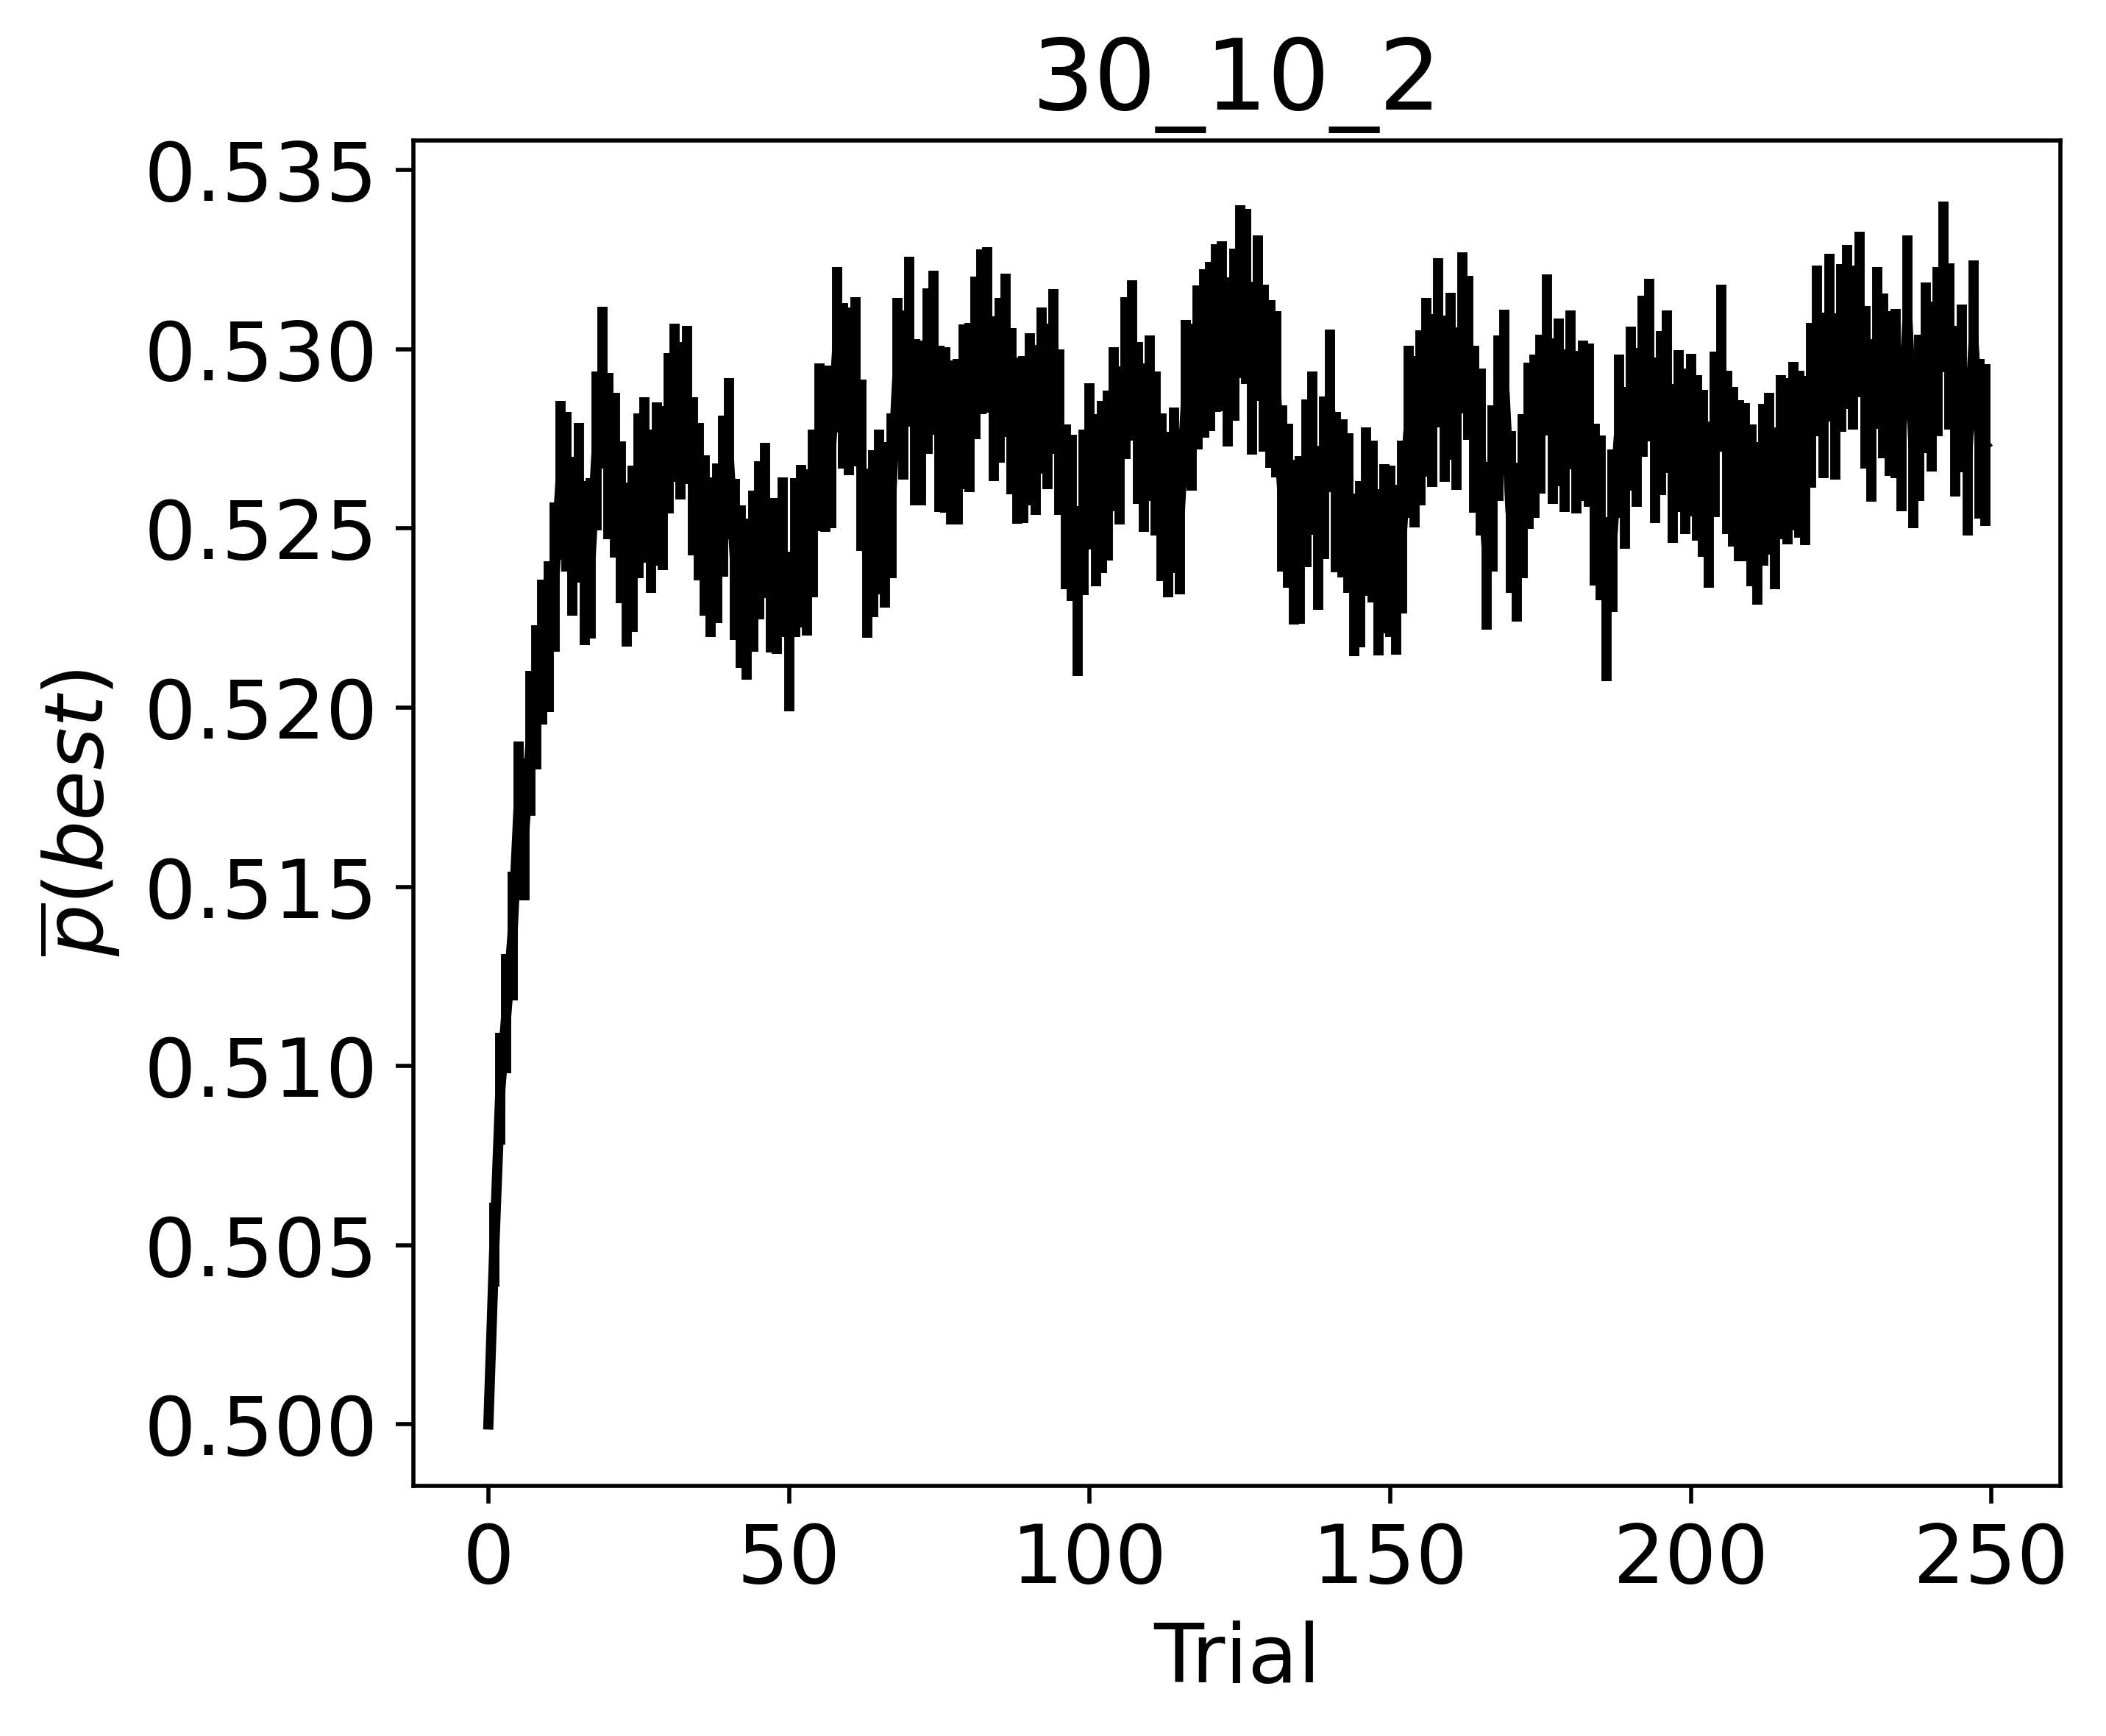

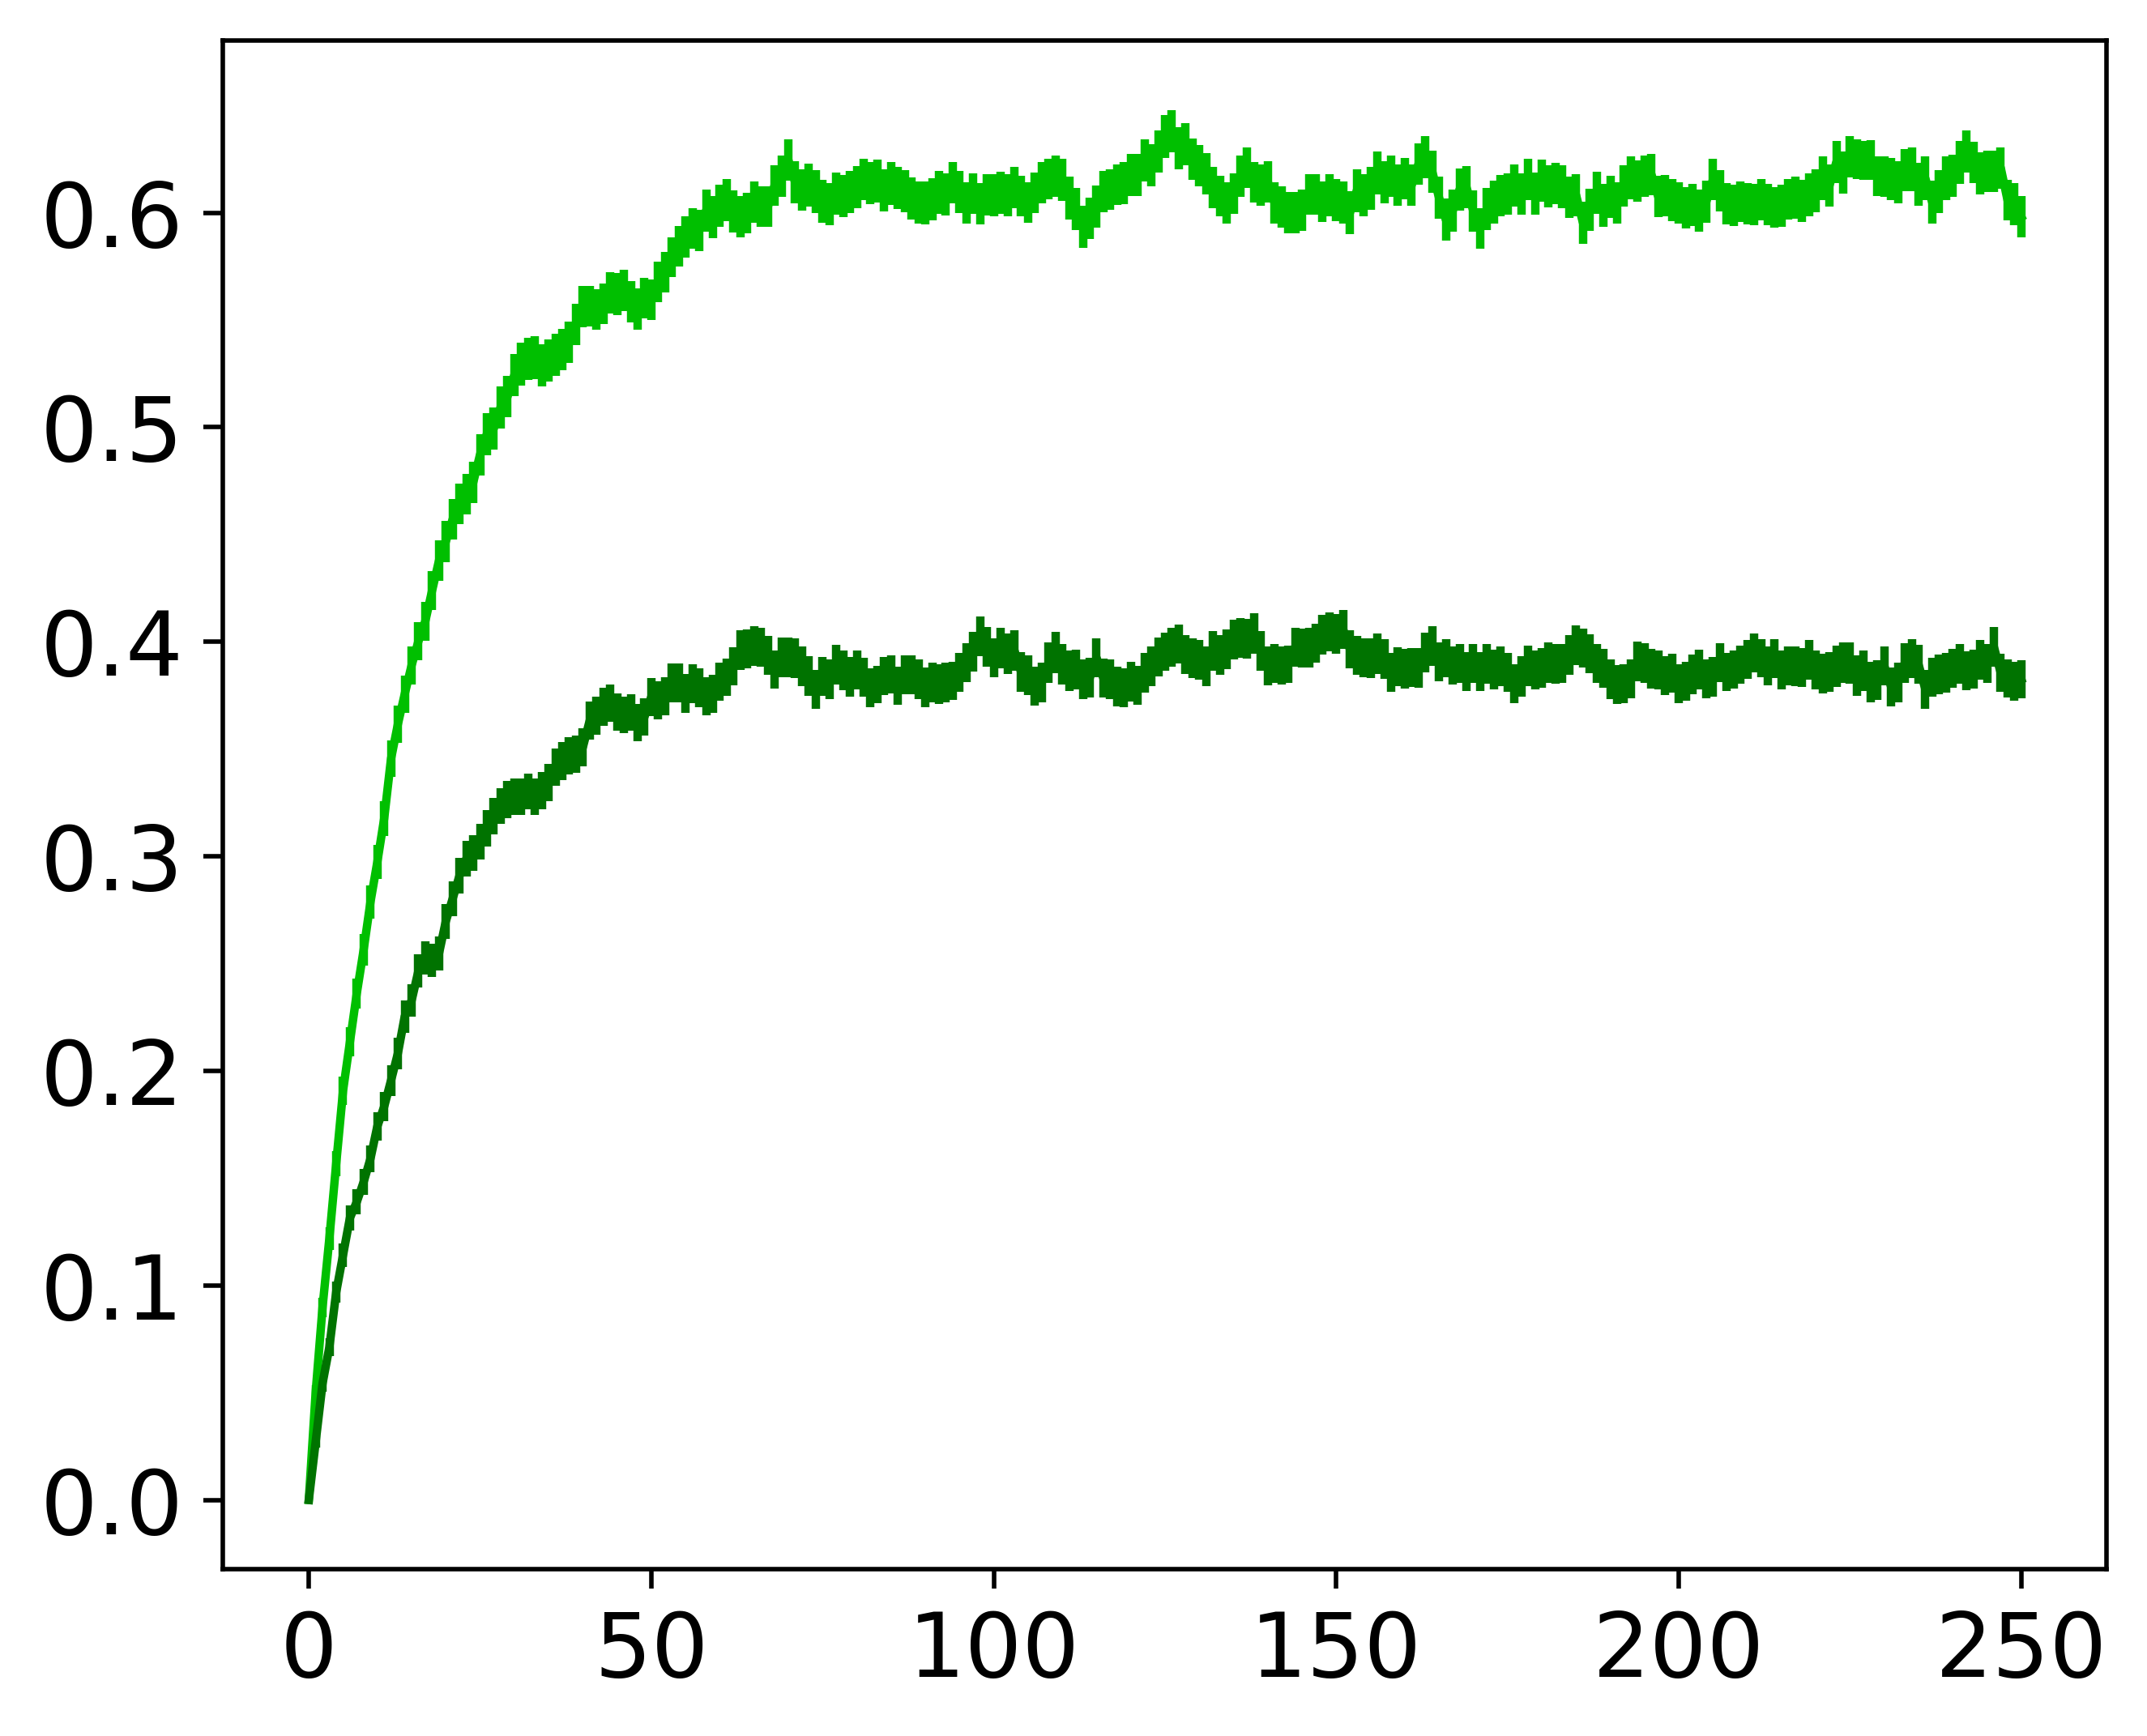

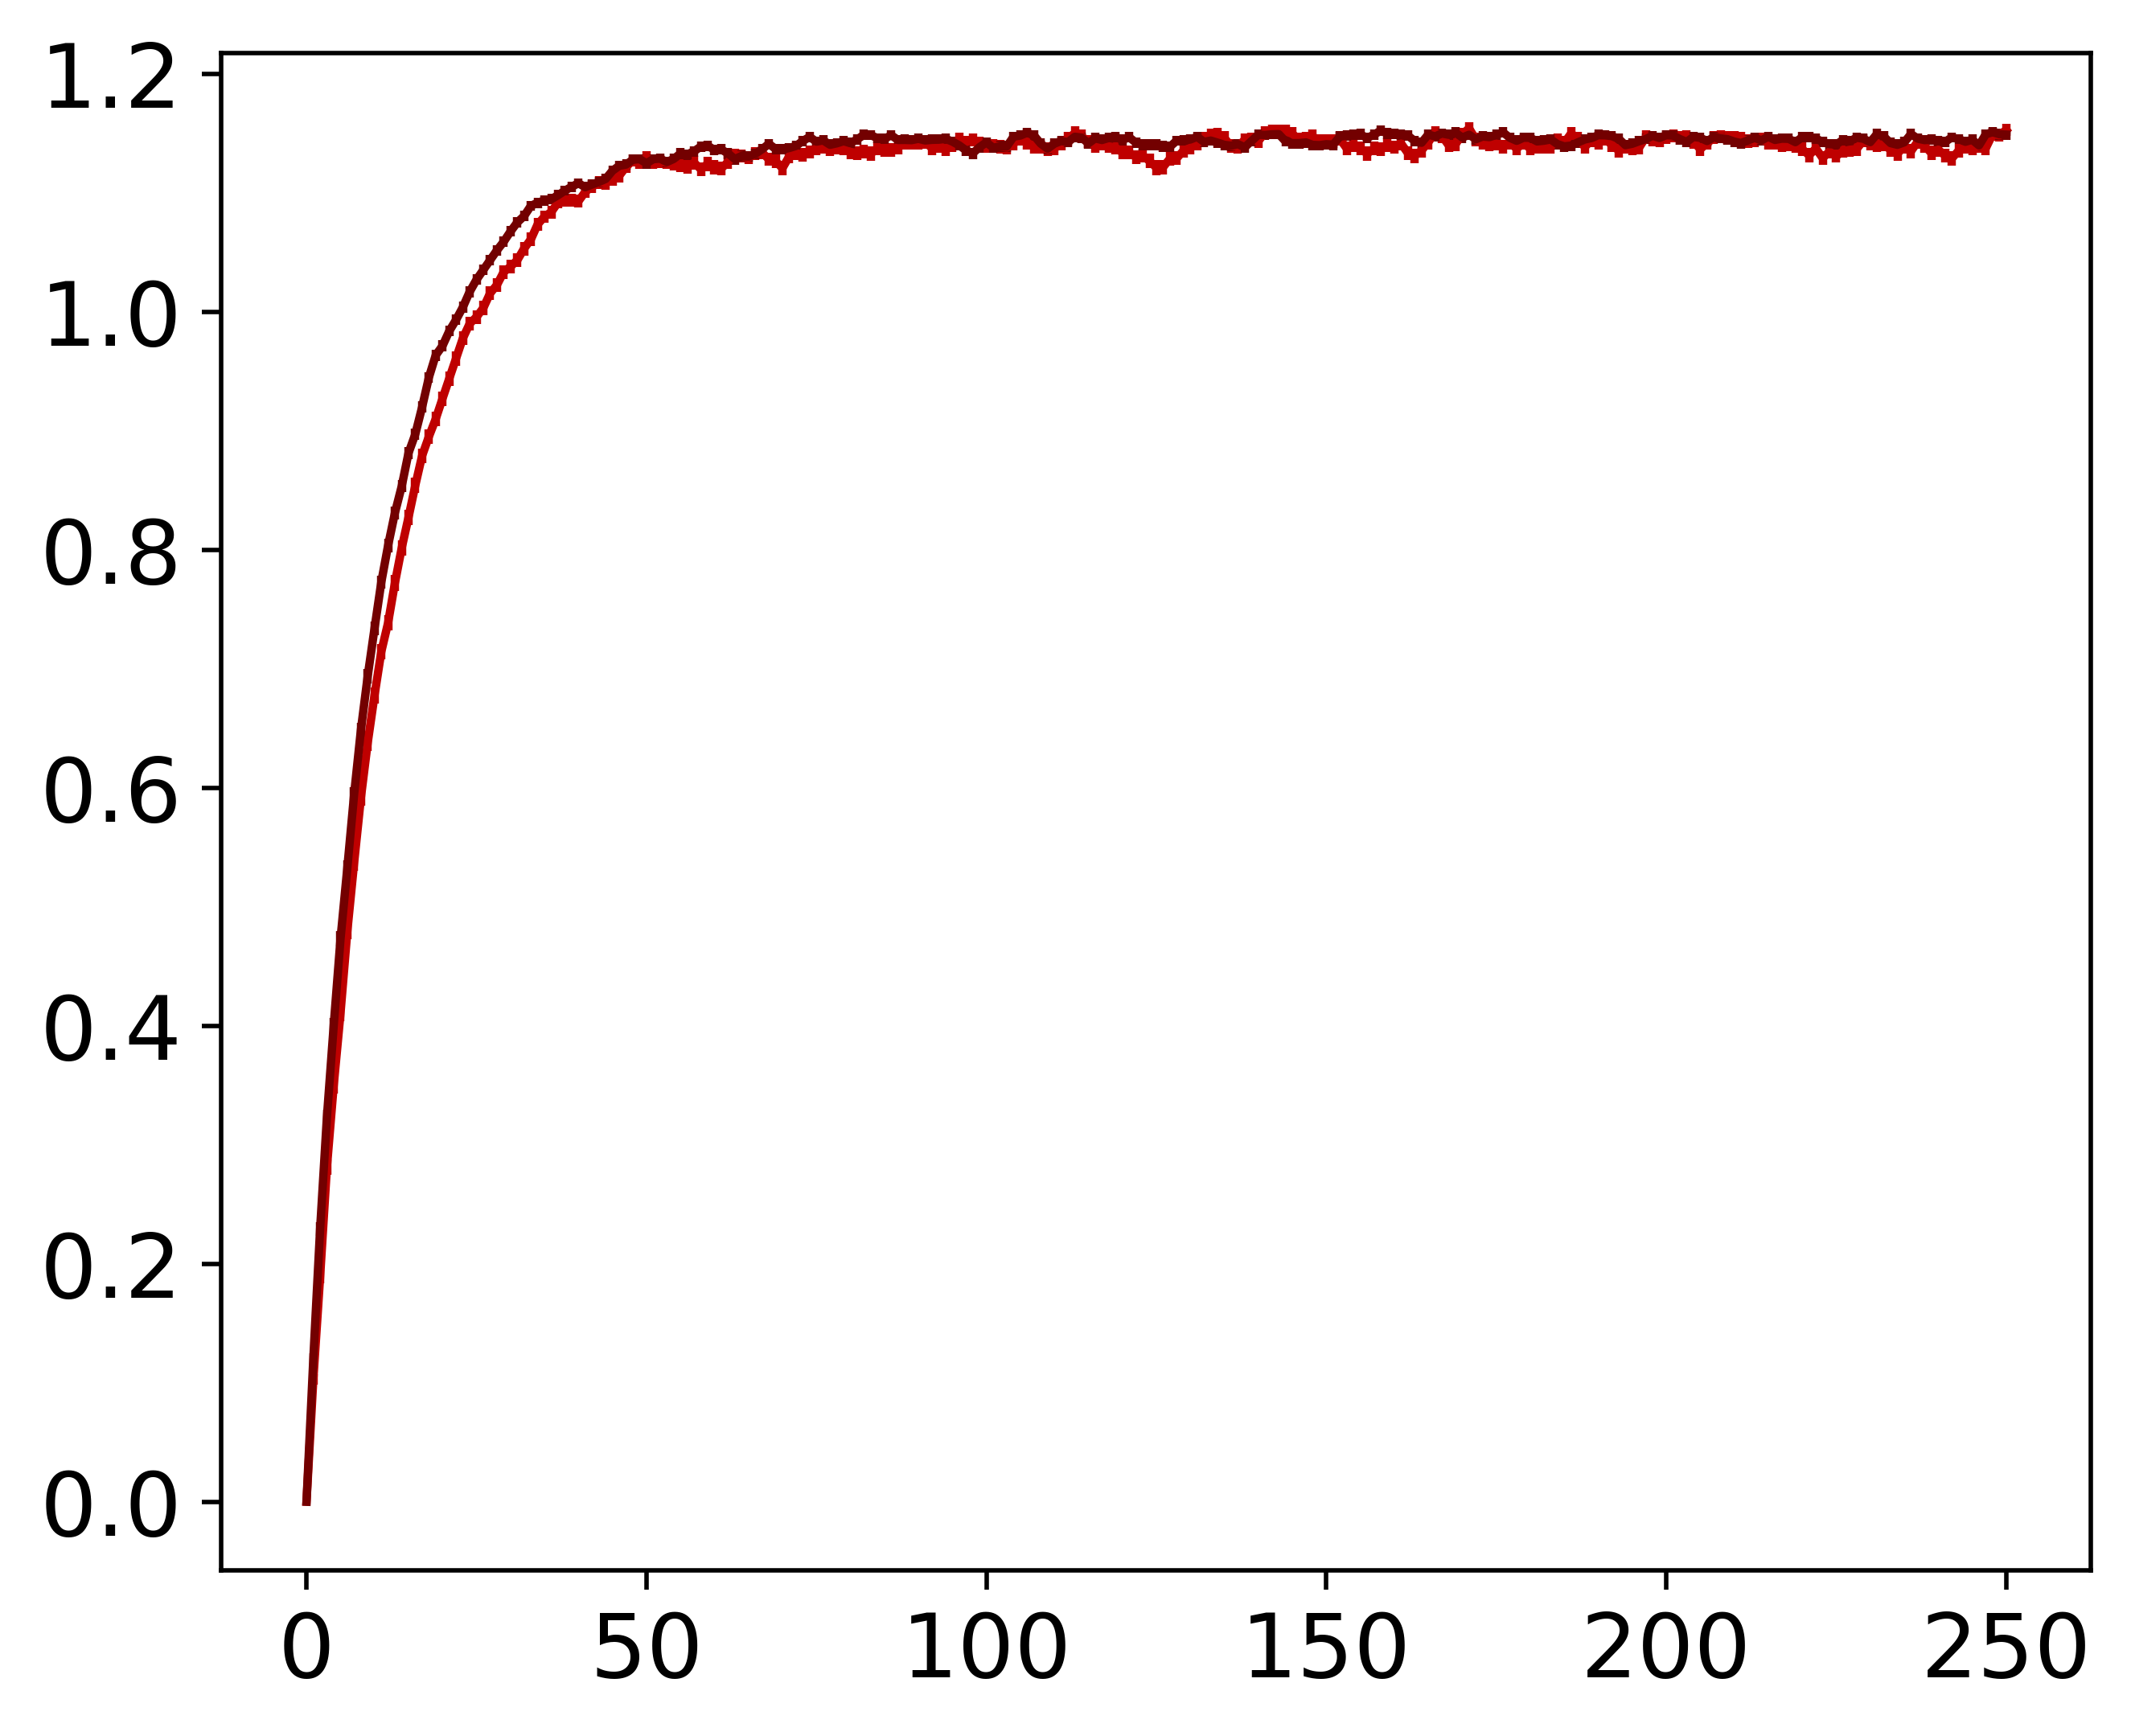

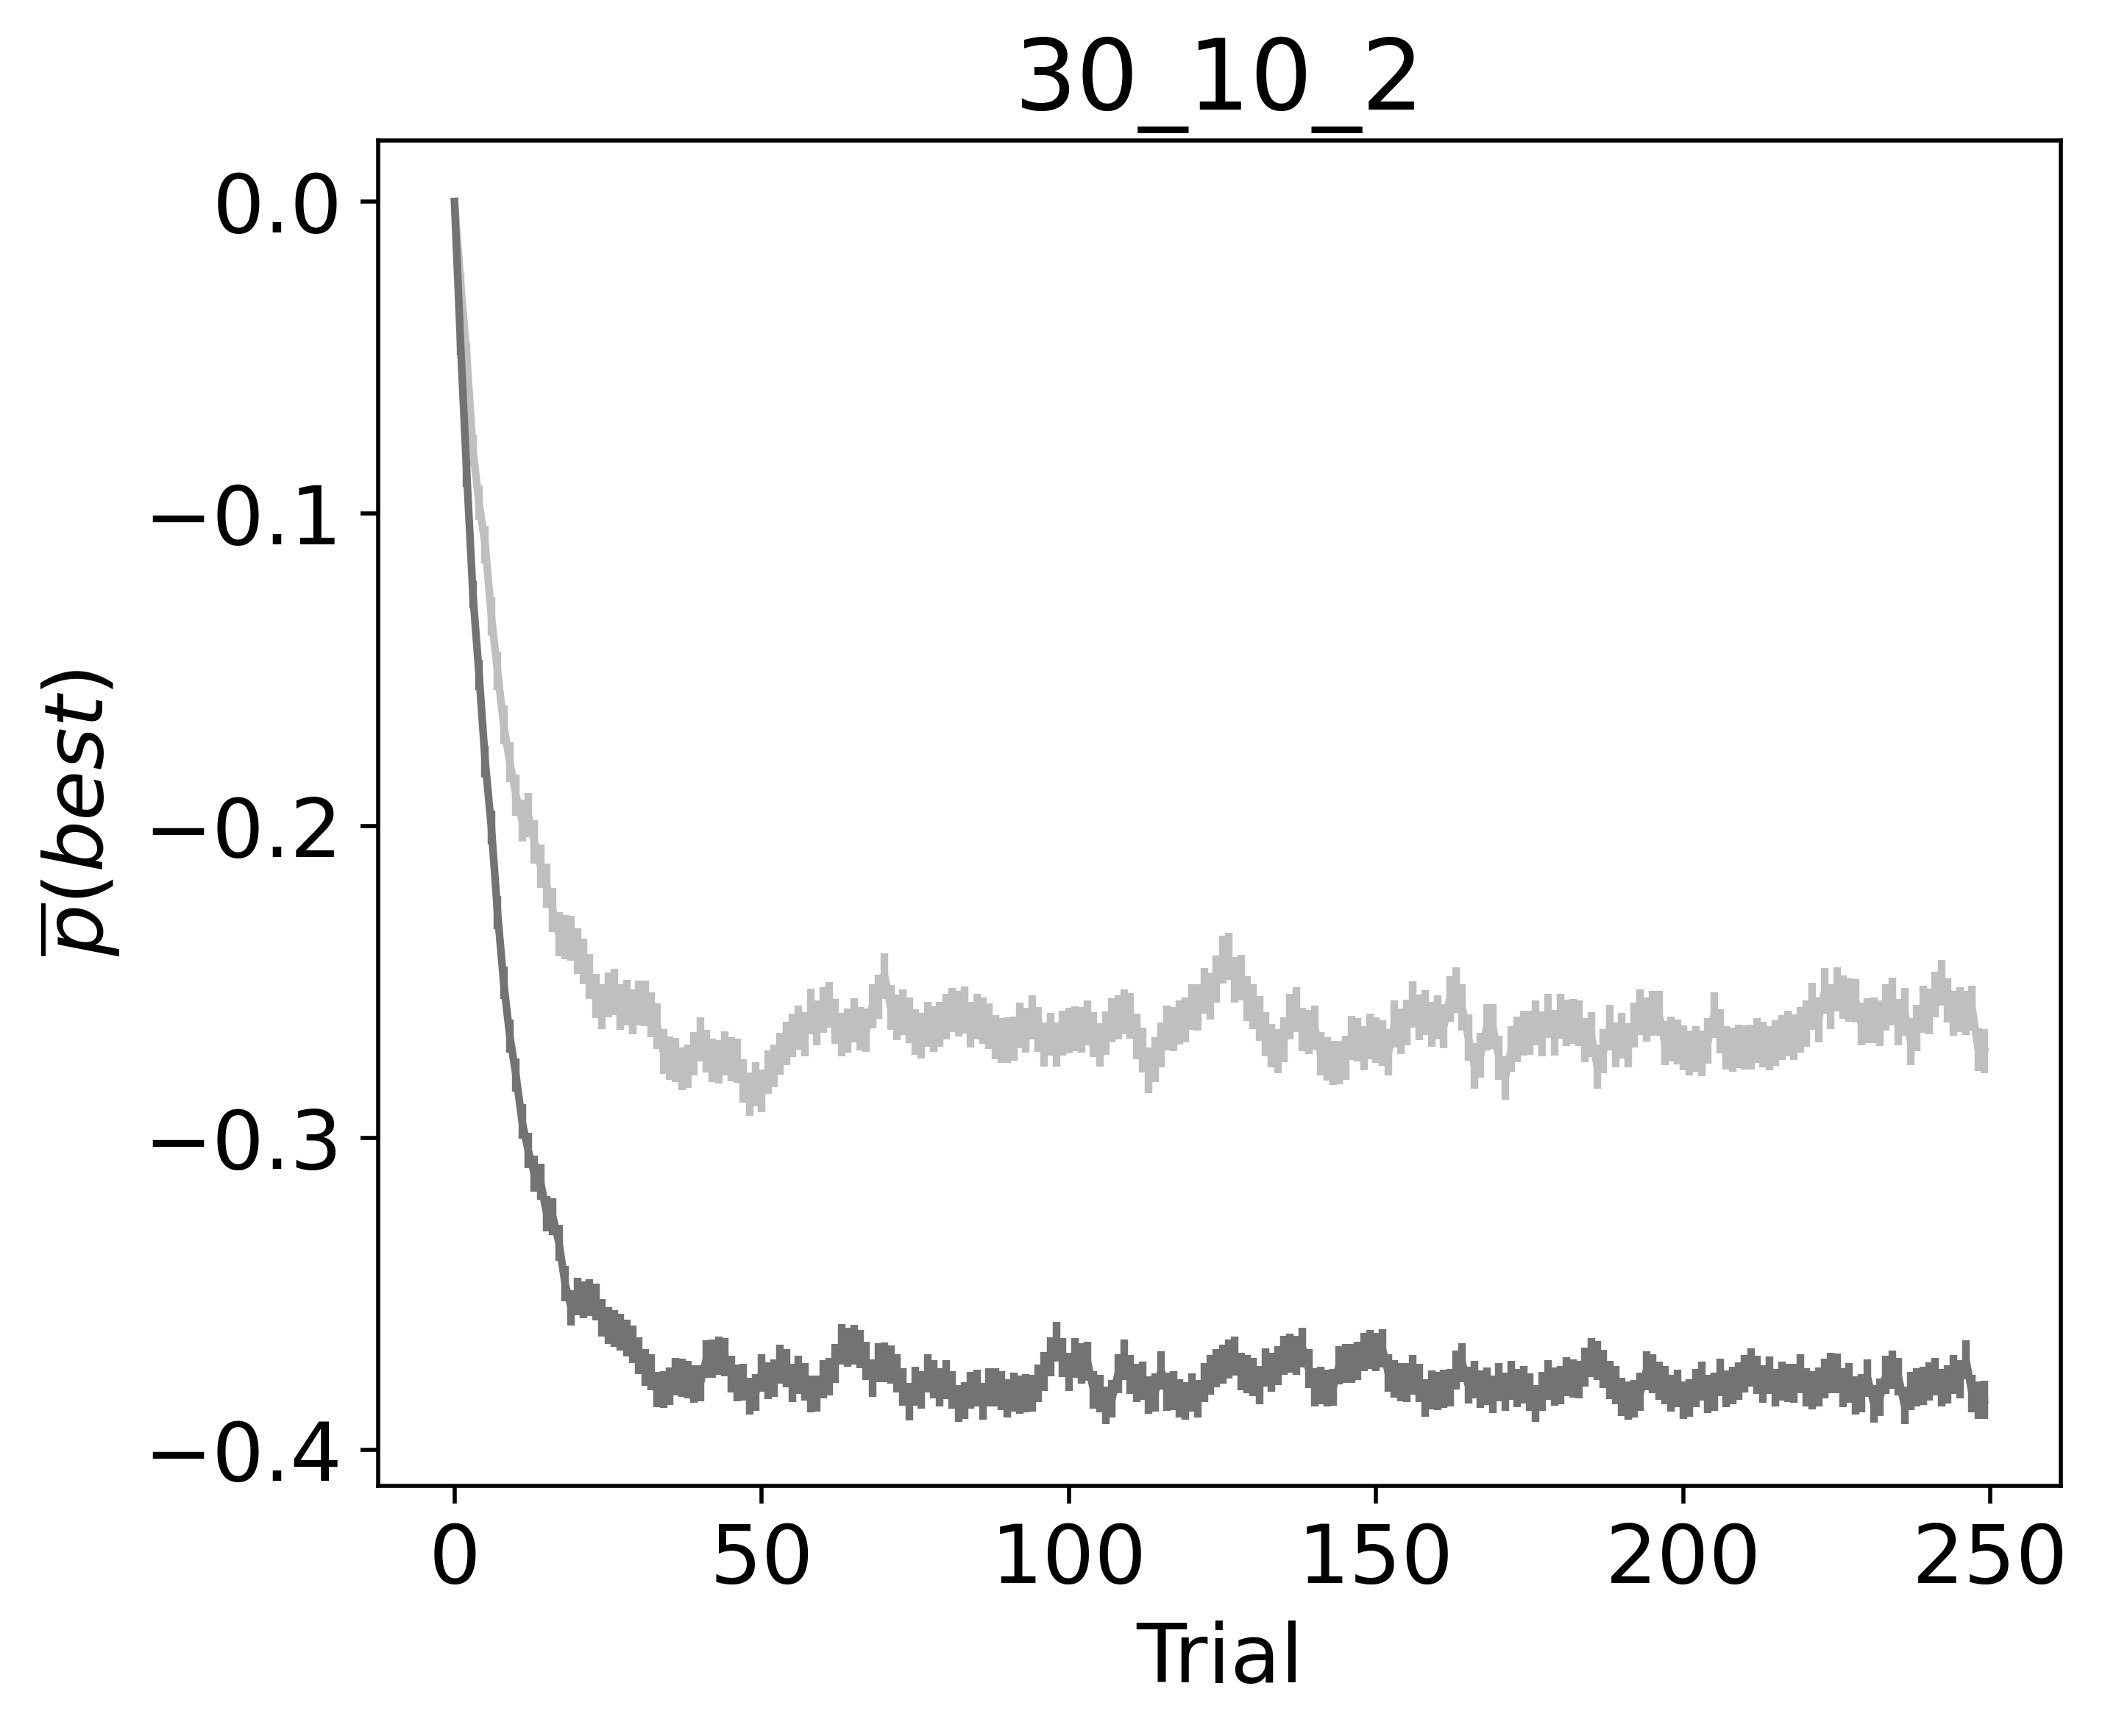

In [202]:
fig, axs = plt.subplots(figsize=(6, 5))
plot_dynamicsb.avg_sm(L_states_Bogacz,n_trials,n_states,0,axs,"black")
plt.title(env)
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(best)$")
plt.tight_layout()

fig, axs1 = plt.subplots(figsize=(6, 5))
fig, axs2 = plt.subplots(figsize=(6, 5))
fig, axs3 = plt.subplots(figsize=(6, 5))
axs = [axs1,axs2,axs3]
plot_dynamicsb.avg_qs(L_states_Bogacz,n_trials,n_states,0,axs,0.75)
plot_dynamicsb.avg_qs(L_states_Bogacz,n_trials,n_states,1,axs,0.45)
# plot_dynamicsb.avg_qs(L_states_Bogacz,n_trials,n_states,2,axs,0.45)
# plot_dynamicsb.avg_qs(L_states_Bogacz,n_trials,n_states,3,axs,0.45)
# plot_dynamicsb.avg_qs(L_states_Bogacz,n_trials,n_states,4,axs,0.45)
# plot_dynamicsb.avg_qs(L_states_Bogacz,n_trials,n_states,5,axs,0.45)
plt.title(env)
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(best)$")
plt.tight_layout()

# Rich

In [203]:
# reproduce optimal learning curve
env = "80_10_%d" %(complexity)
R_states_Bogacz = learningbogacz.simulate(params,n_states,n_trials,env = env, policy="softmax",rmag = r_mag, lmag = l_mag)

env_ref = "80_10_1" 
R_states_Bogacz_ref = learningbogacz.simulate(params,n_states,n_trials,env = env_ref, policy="softmax",rmag = r_mag, lmag = l_mag)

env_ref_second = "70_10_1" 
R_states_Bogacz_ref_second = learningbogacz.simulate(params,n_states,n_trials,env = env_ref_second, policy="softmax",rmag = r_mag, lmag = l_mag)

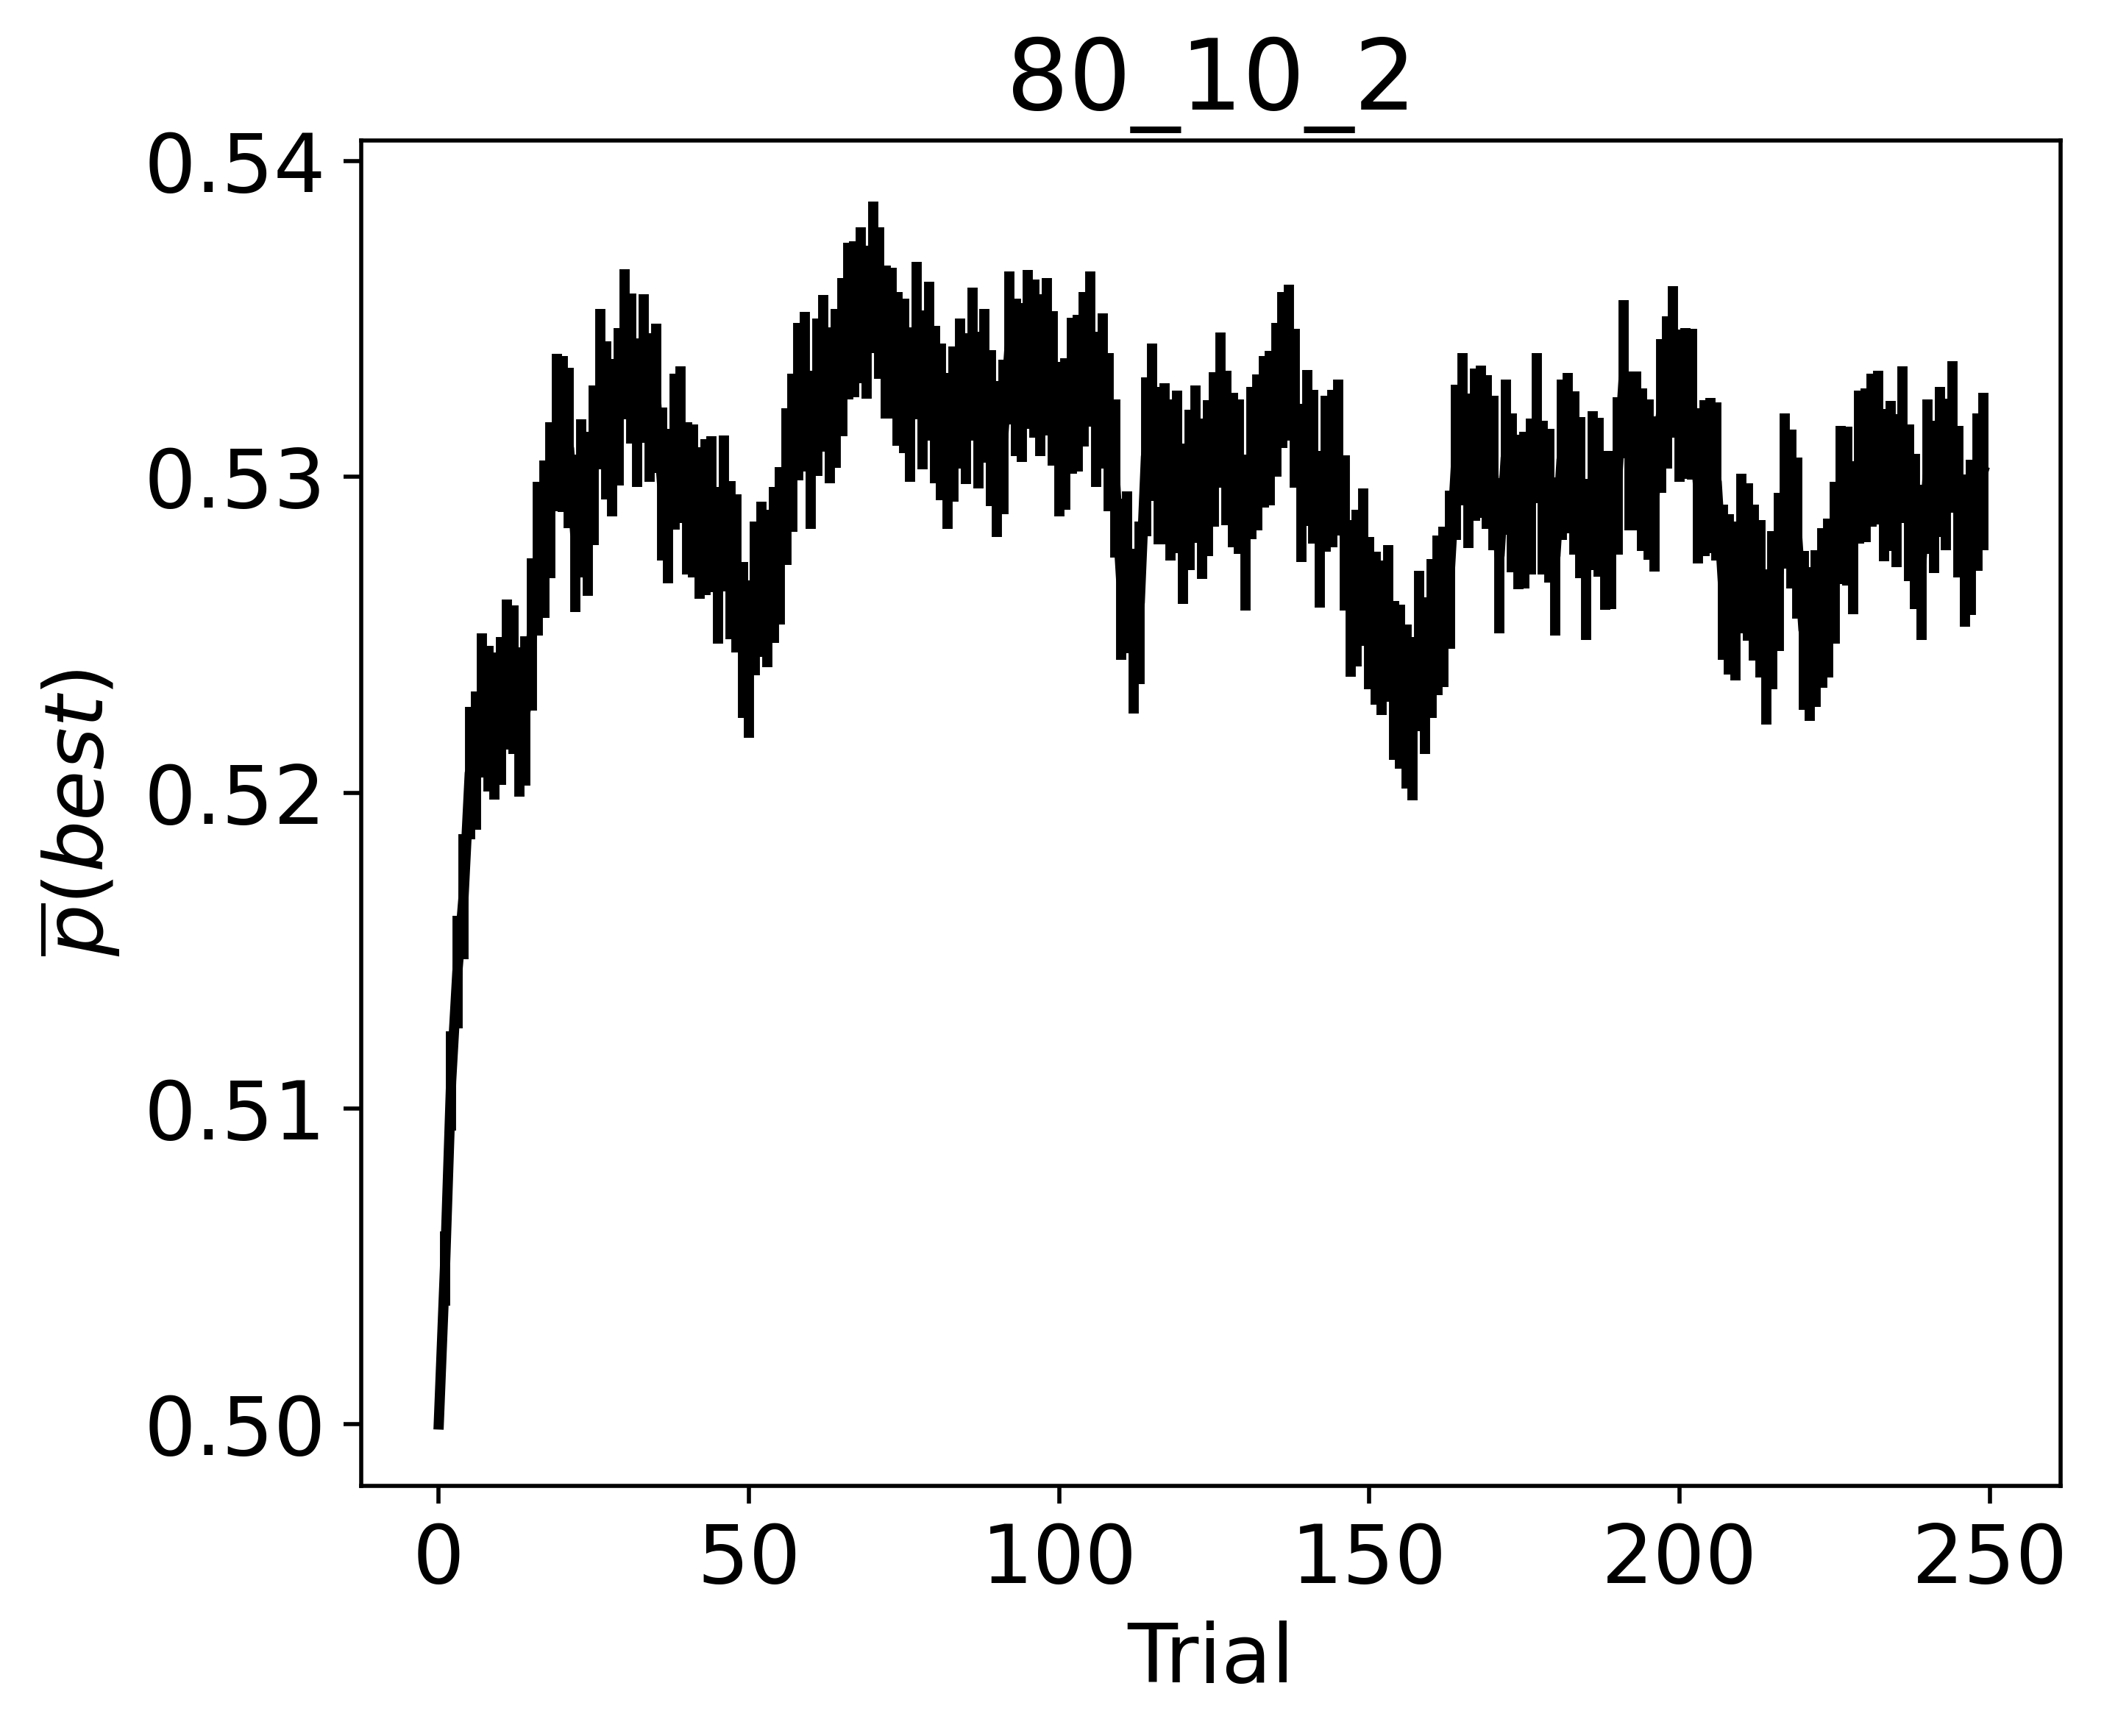

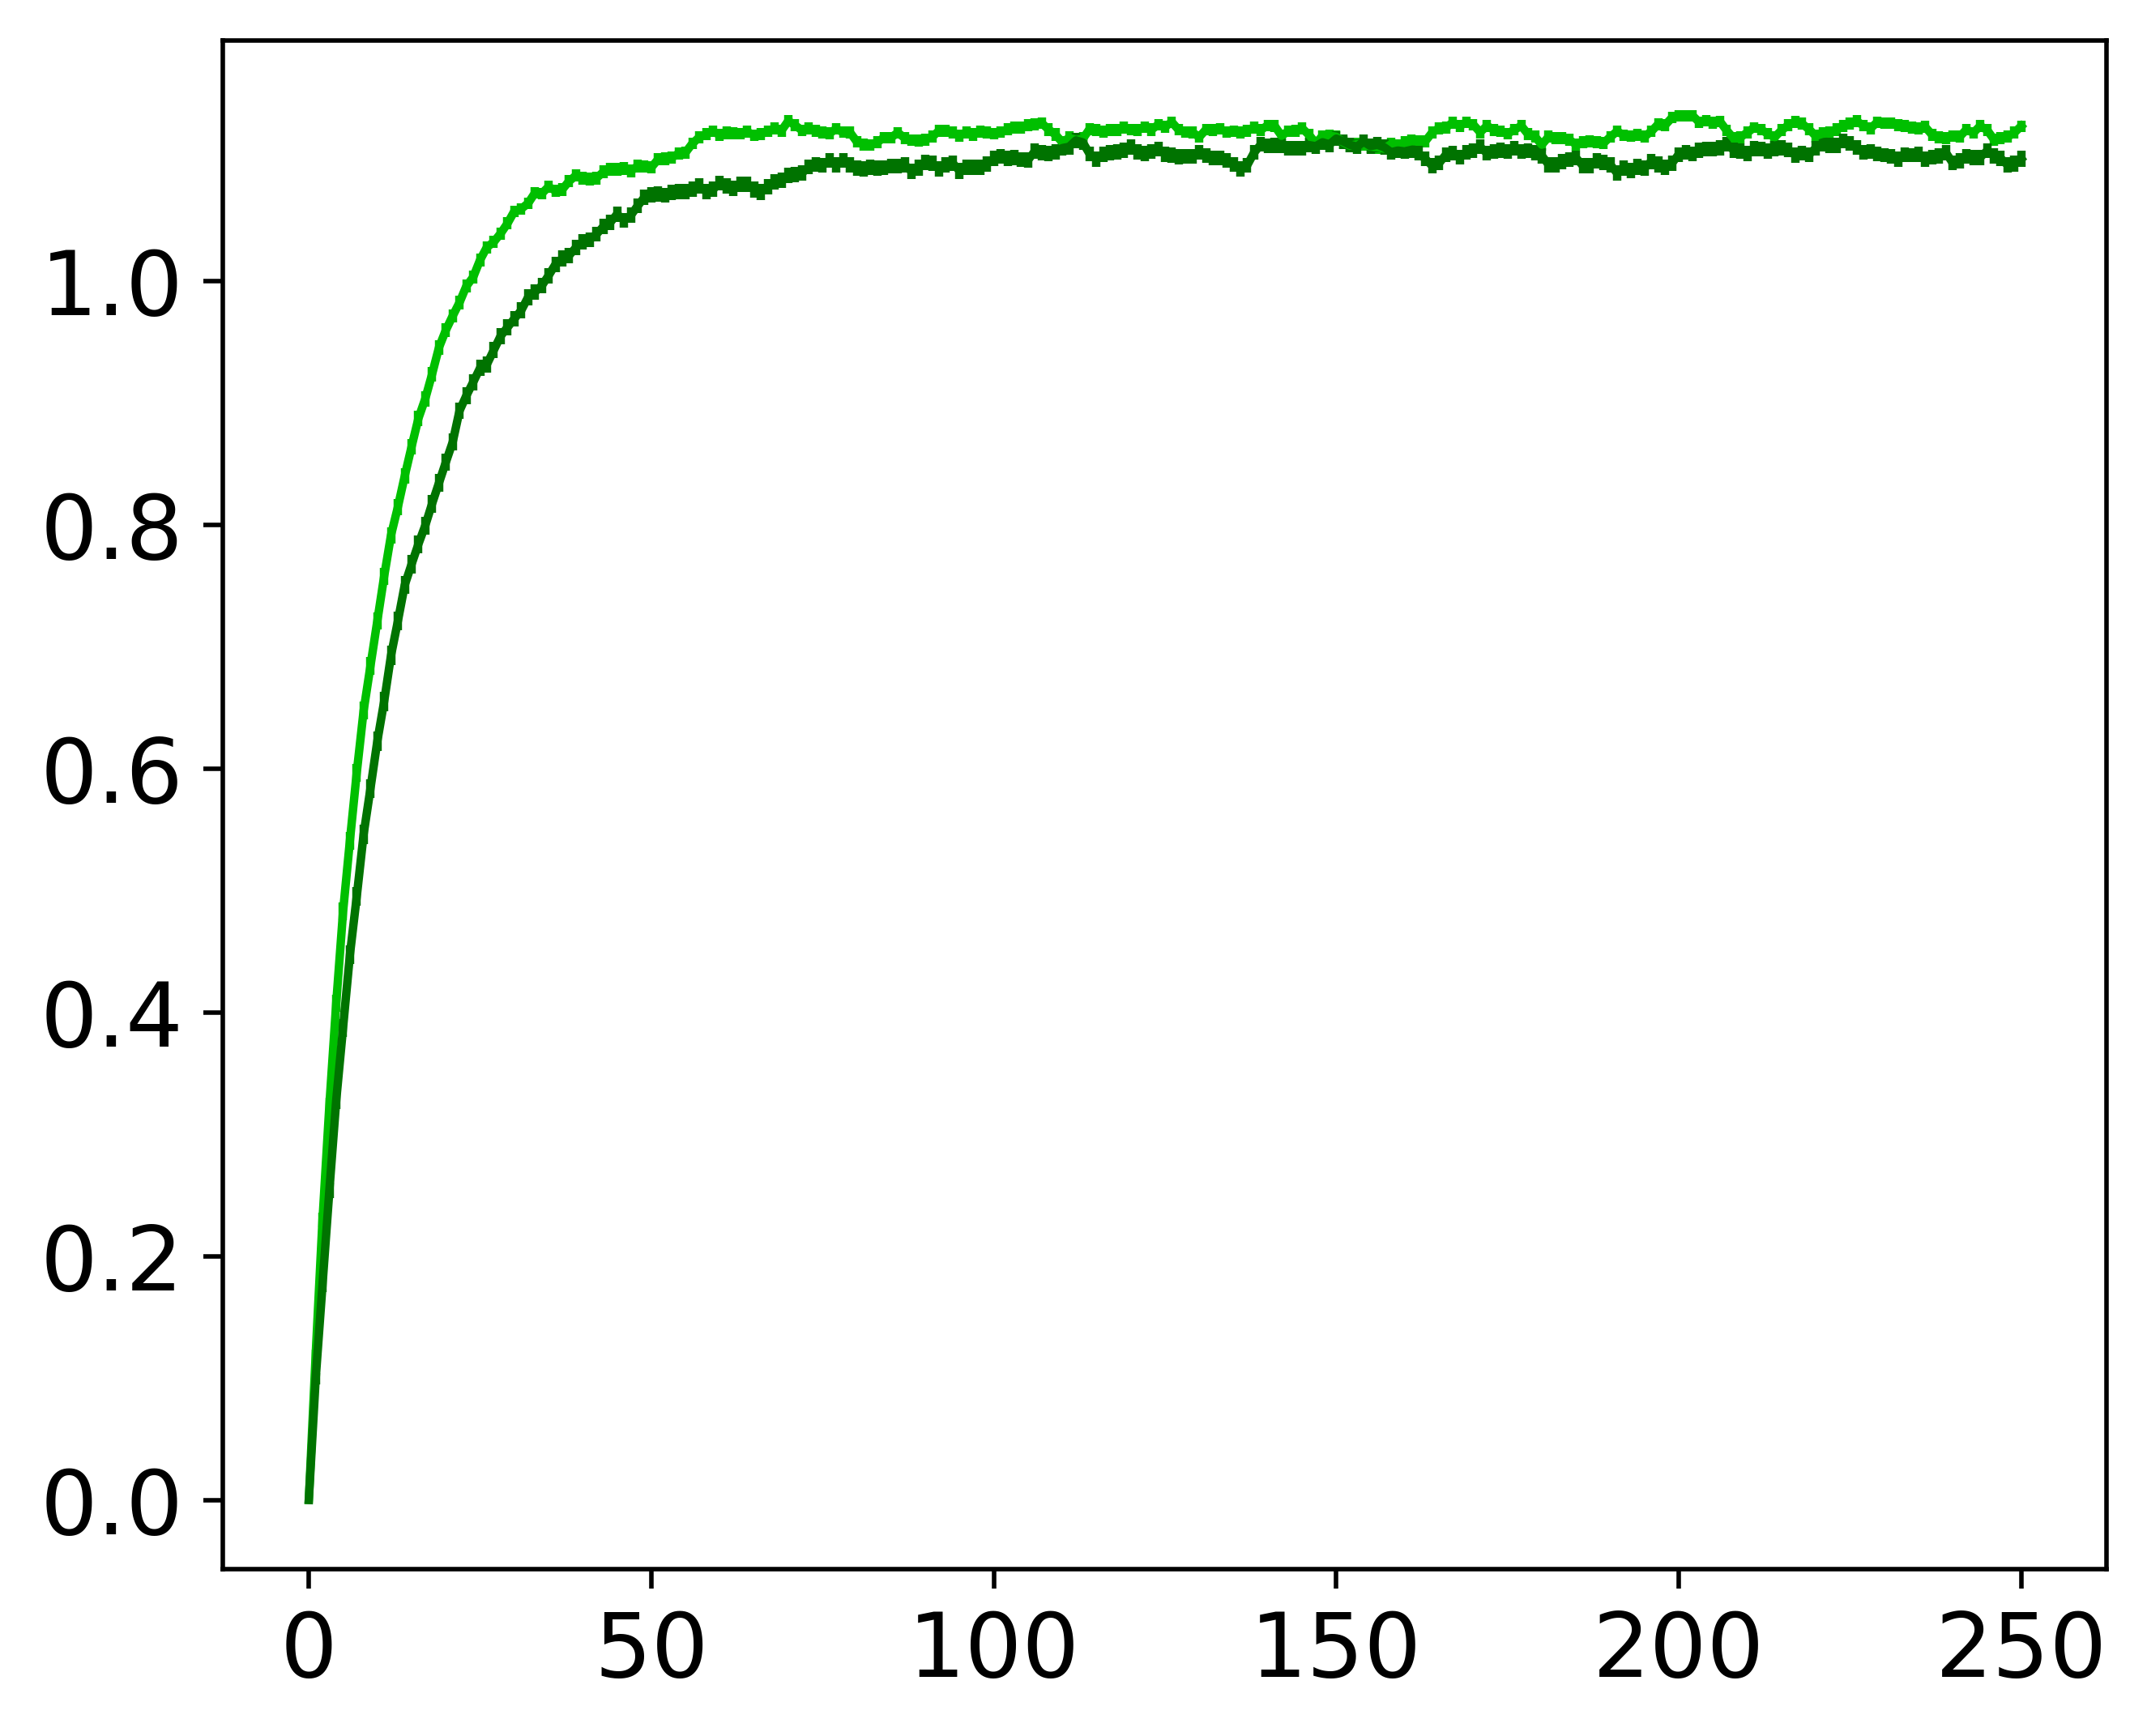

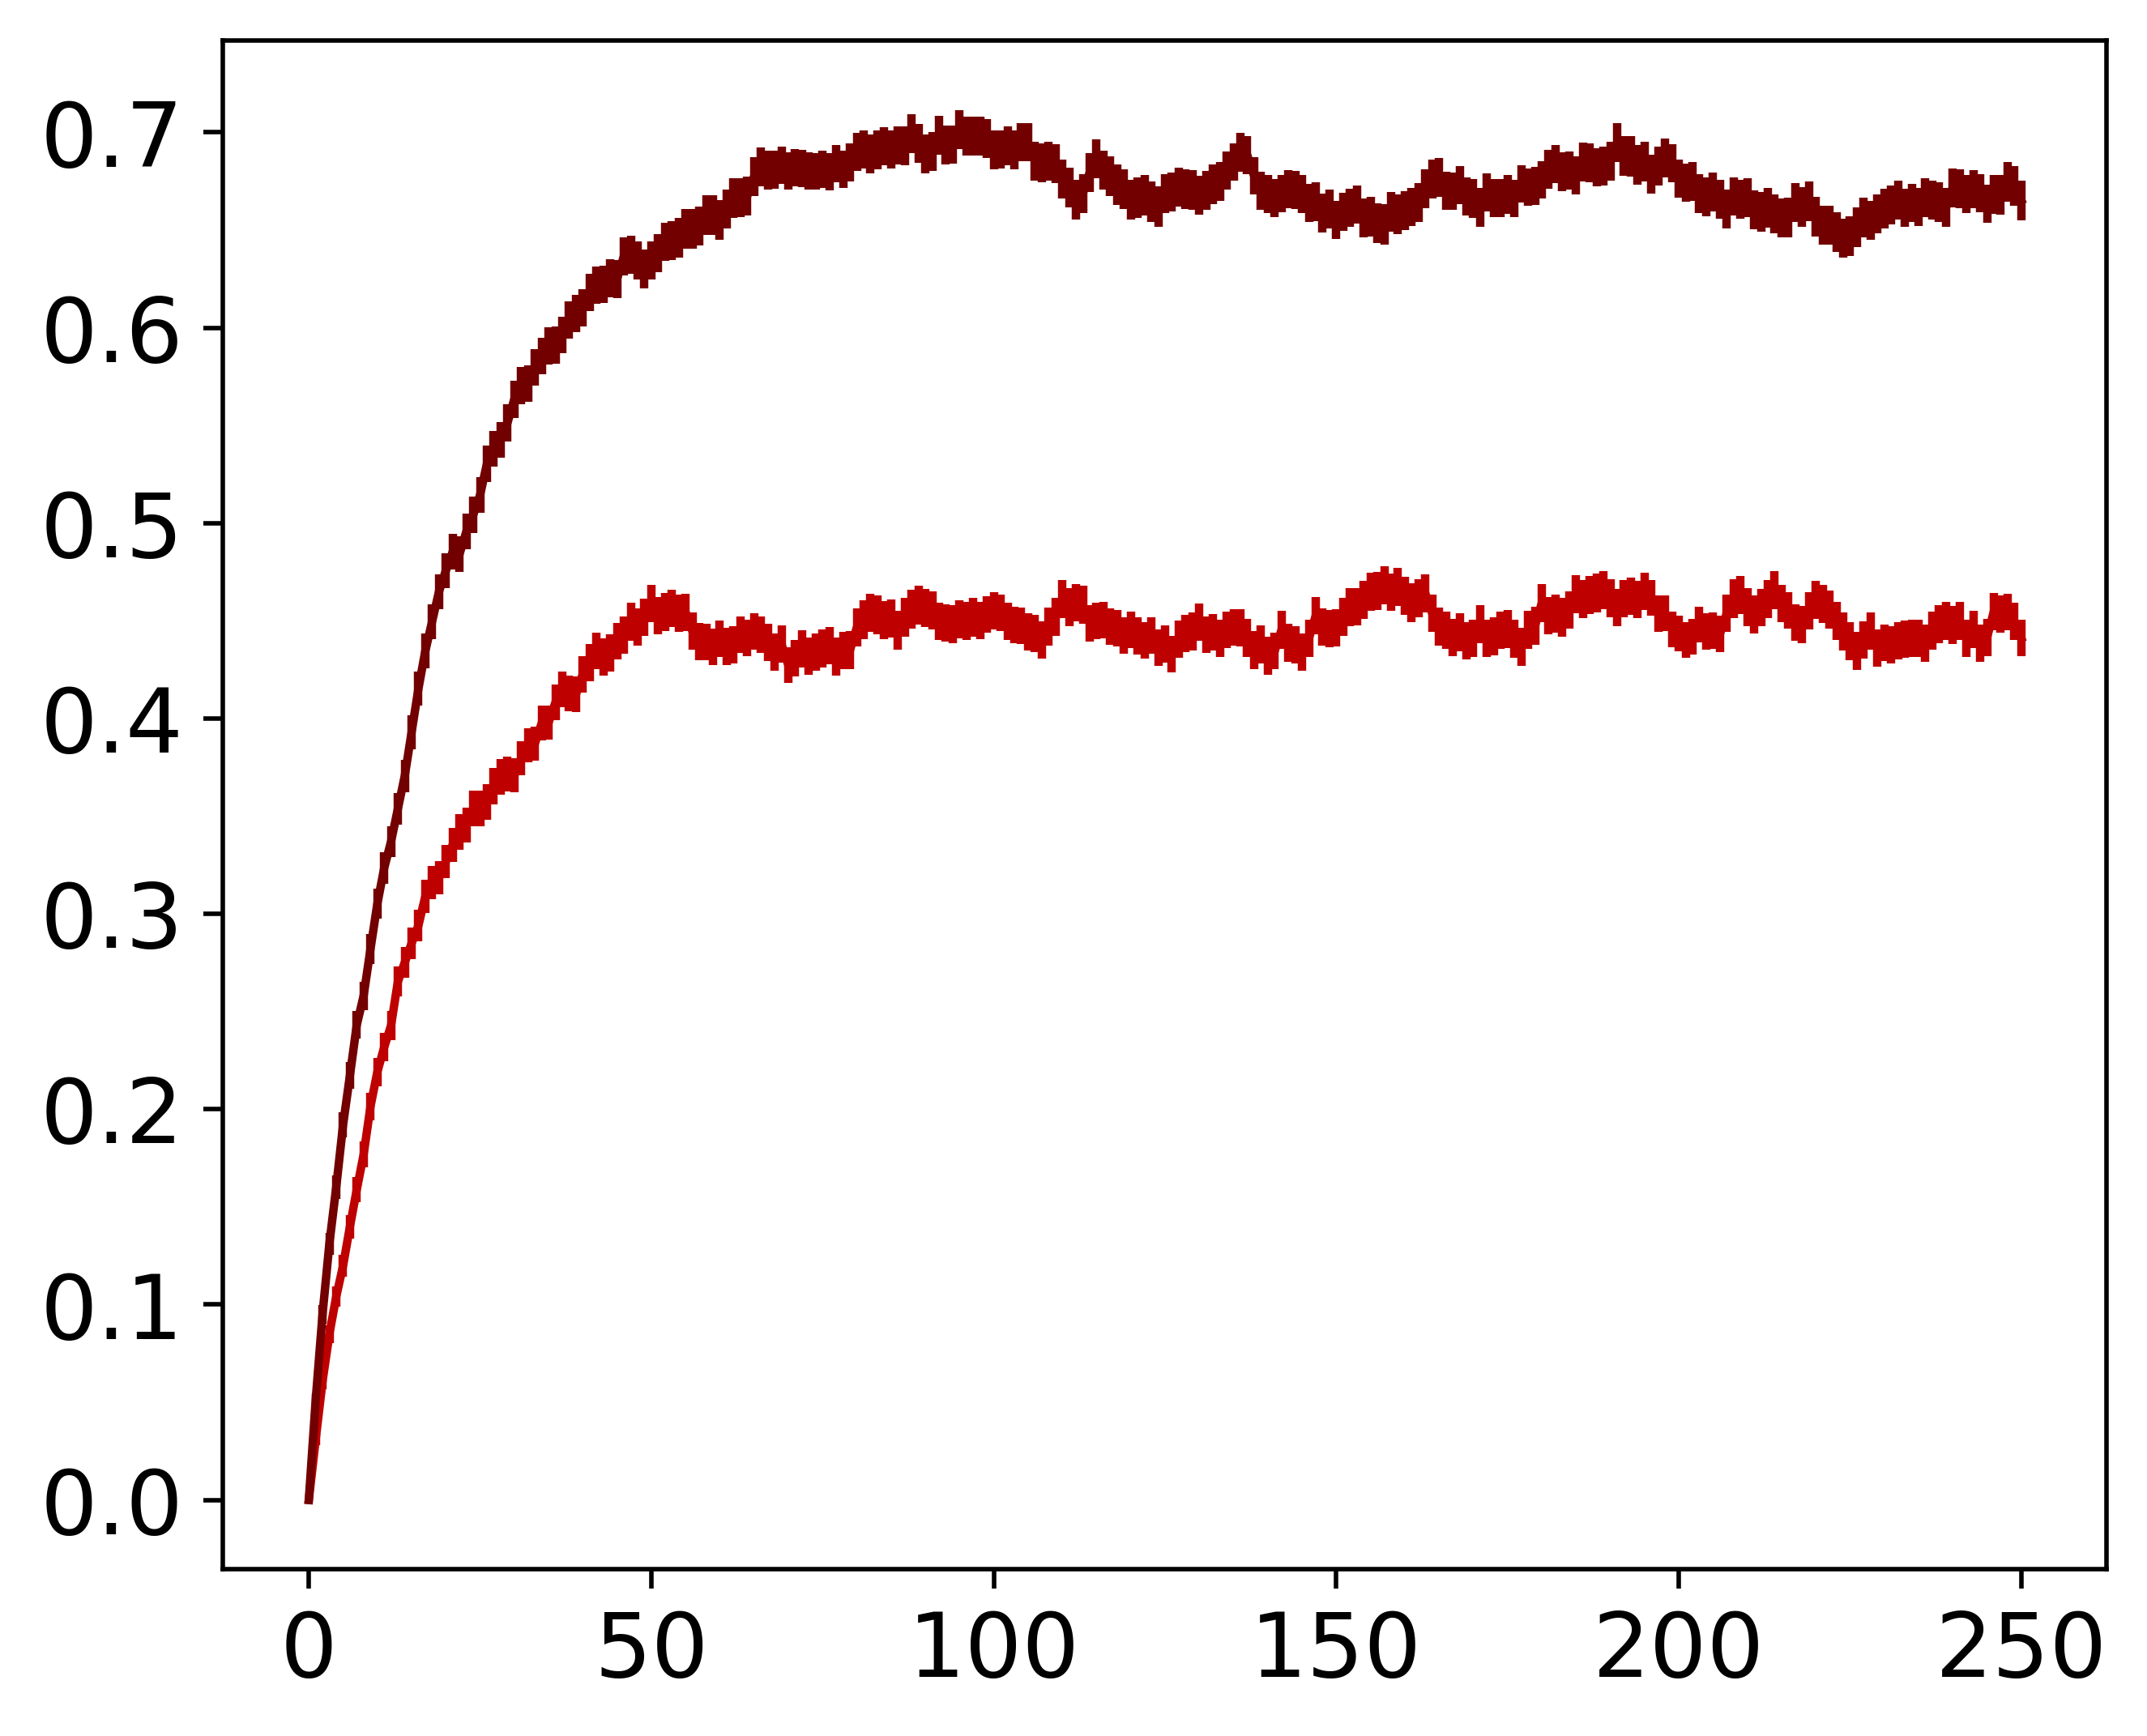

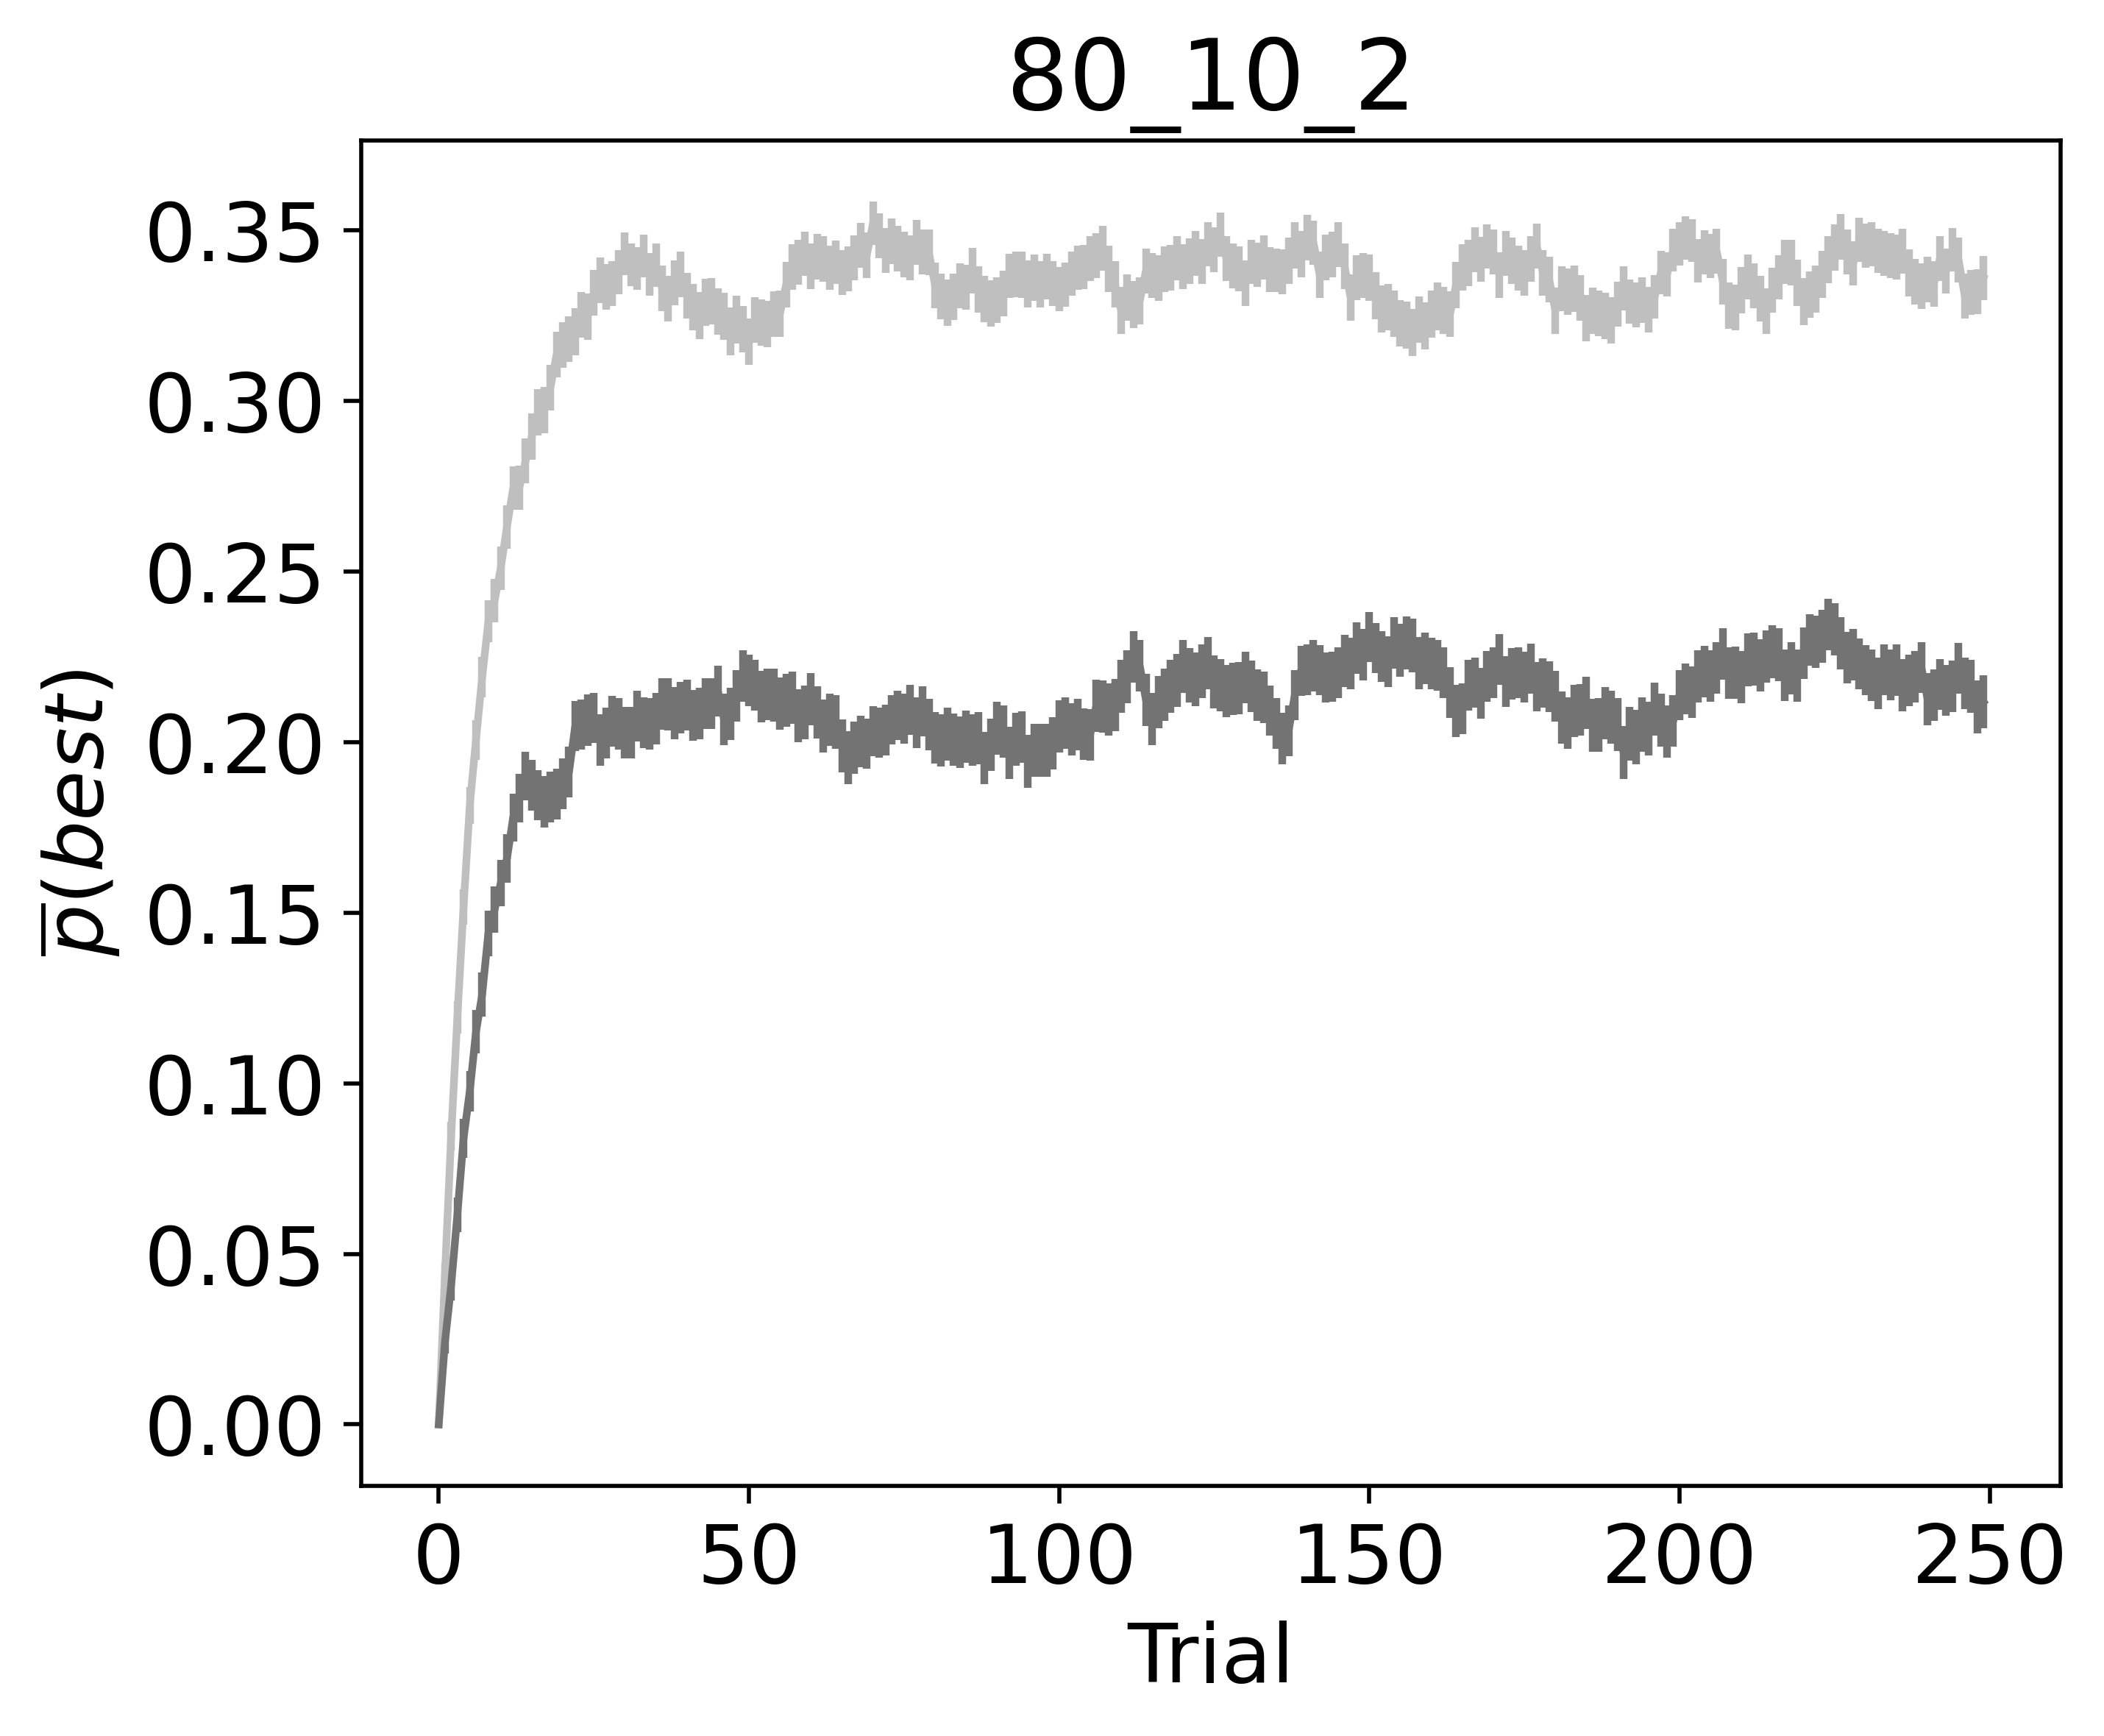

In [204]:
fig, axs = plt.subplots(figsize=(6, 5))
plot_dynamicsb.avg_sm(R_states_Bogacz,n_trials,n_states,0,axs,"black")
plt.title(env)
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(best)$")
plt.tight_layout()

fig, axs1 = plt.subplots(figsize=(6, 5))
fig, axs2 = plt.subplots(figsize=(6, 5))
fig, axs3 = plt.subplots(figsize=(6, 5))
axs = [axs1,axs2,axs3]
plot_dynamicsb.avg_qs(R_states_Bogacz,n_trials,n_states,0,axs,0.75)
plot_dynamicsb.avg_qs(R_states_Bogacz,n_trials,n_states,1,axs,0.45)
# plot_dynamicsb.avg_qs(R_states_Bogacz,n_trials,n_states,2,axs,0.45)
# plot_dynamicsb.avg_qs(R_states_Bogacz,n_trials,n_states,3,axs,0.45)
# plot_dynamicsb.avg_qs(R_states_Bogacz,n_trials,n_states,4,axs,0.45)
# plot_dynamicsb.avg_qs(R_states_Bogacz,n_trials,n_states,5,axs,0.45)
plt.title(env)
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(best)$")
plt.tight_layout()

# Convergence analysis

In [205]:
def second_best_q(state):
    '''
    get index of second best Q value, excluding the optimal action
    ''' 

    subset = state.Q[:,1:]
    second_best = np.argmax(subset,axis=1) + 1 # add 1, took away best which is index of 0
    return second_best

def second_best_V(state):
    '''
    get index of second best V value, excluding the optimal action
    ''' 

    subset = state.V[:,1:]
    second_best = np.argmax(subset,axis=1) + 1 # add 1, took away best which is index of 0
    return second_best

def second_best_SM(state):
    '''
    get index of second best SM value, excluding the optimal action
    ''' 

    subset = state.SM[:,1:]
    second_best = np.argmax(subset,axis=1) + 1 # add 1, took away best which is index of 0
    return second_best

def softmax(A,B):
    '''
    softmax of p(A) with binary choice A/B
    '''

    # multioption softmax (invariant to constant offsets)
    arr_options = np.array([A,B])
    Act = arr_options - np.max(arr_options)
    expAct = np.exp(Act)
    ps = expAct/np.sum(expAct)
    
    return ps[0]
    

In [206]:
# calculate reference point
r_ref = np.mean([.5*(state.QG[n_trials] - state.QN[n_trials])  for state in R_states_Bogacz_ref])
r_ref_G = np.mean([state.QG[n_trials] for state in R_states_Bogacz_ref])
r_ref_N = np.mean([state.QN[n_trials] for state in R_states_Bogacz_ref])
r_ref_second = np.mean([np.mean(.5*state.QG[n_trials] - .5*state.QN[n_trials]) for state in R_states_Bogacz_ref_second]) 
r_ref_G_second = np.mean([np.mean(state.QG[n_trials]) for state in R_states_Bogacz_ref_second]) 
r_ref_N_second = np.mean([np.mean(state.QN[n_trials]) for state in R_states_Bogacz_ref_second])

l_ref = np.mean([.5*(state.QG[n_trials] - state.QN[n_trials])  for state in L_states_Bogacz_ref])
l_ref_G = np.mean([state.QG[n_trials] for state in L_states_Bogacz_ref])
l_ref_N = np.mean([state.QN[n_trials] for state in L_states_Bogacz_ref])
l_ref_second = np.mean([np.mean(.5*state.QG[n_trials] - .5*state.QN[n_trials]) for state in L_states_Bogacz_ref_second]) 
l_ref_G_second = np.mean([np.mean(state.QG[n_trials]) for state in L_states_Bogacz_ref_second]) 
l_ref_N_second = np.mean([np.mean(state.QN[n_trials]) for state in L_states_Bogacz_ref_second])


(0.5, 1.0)

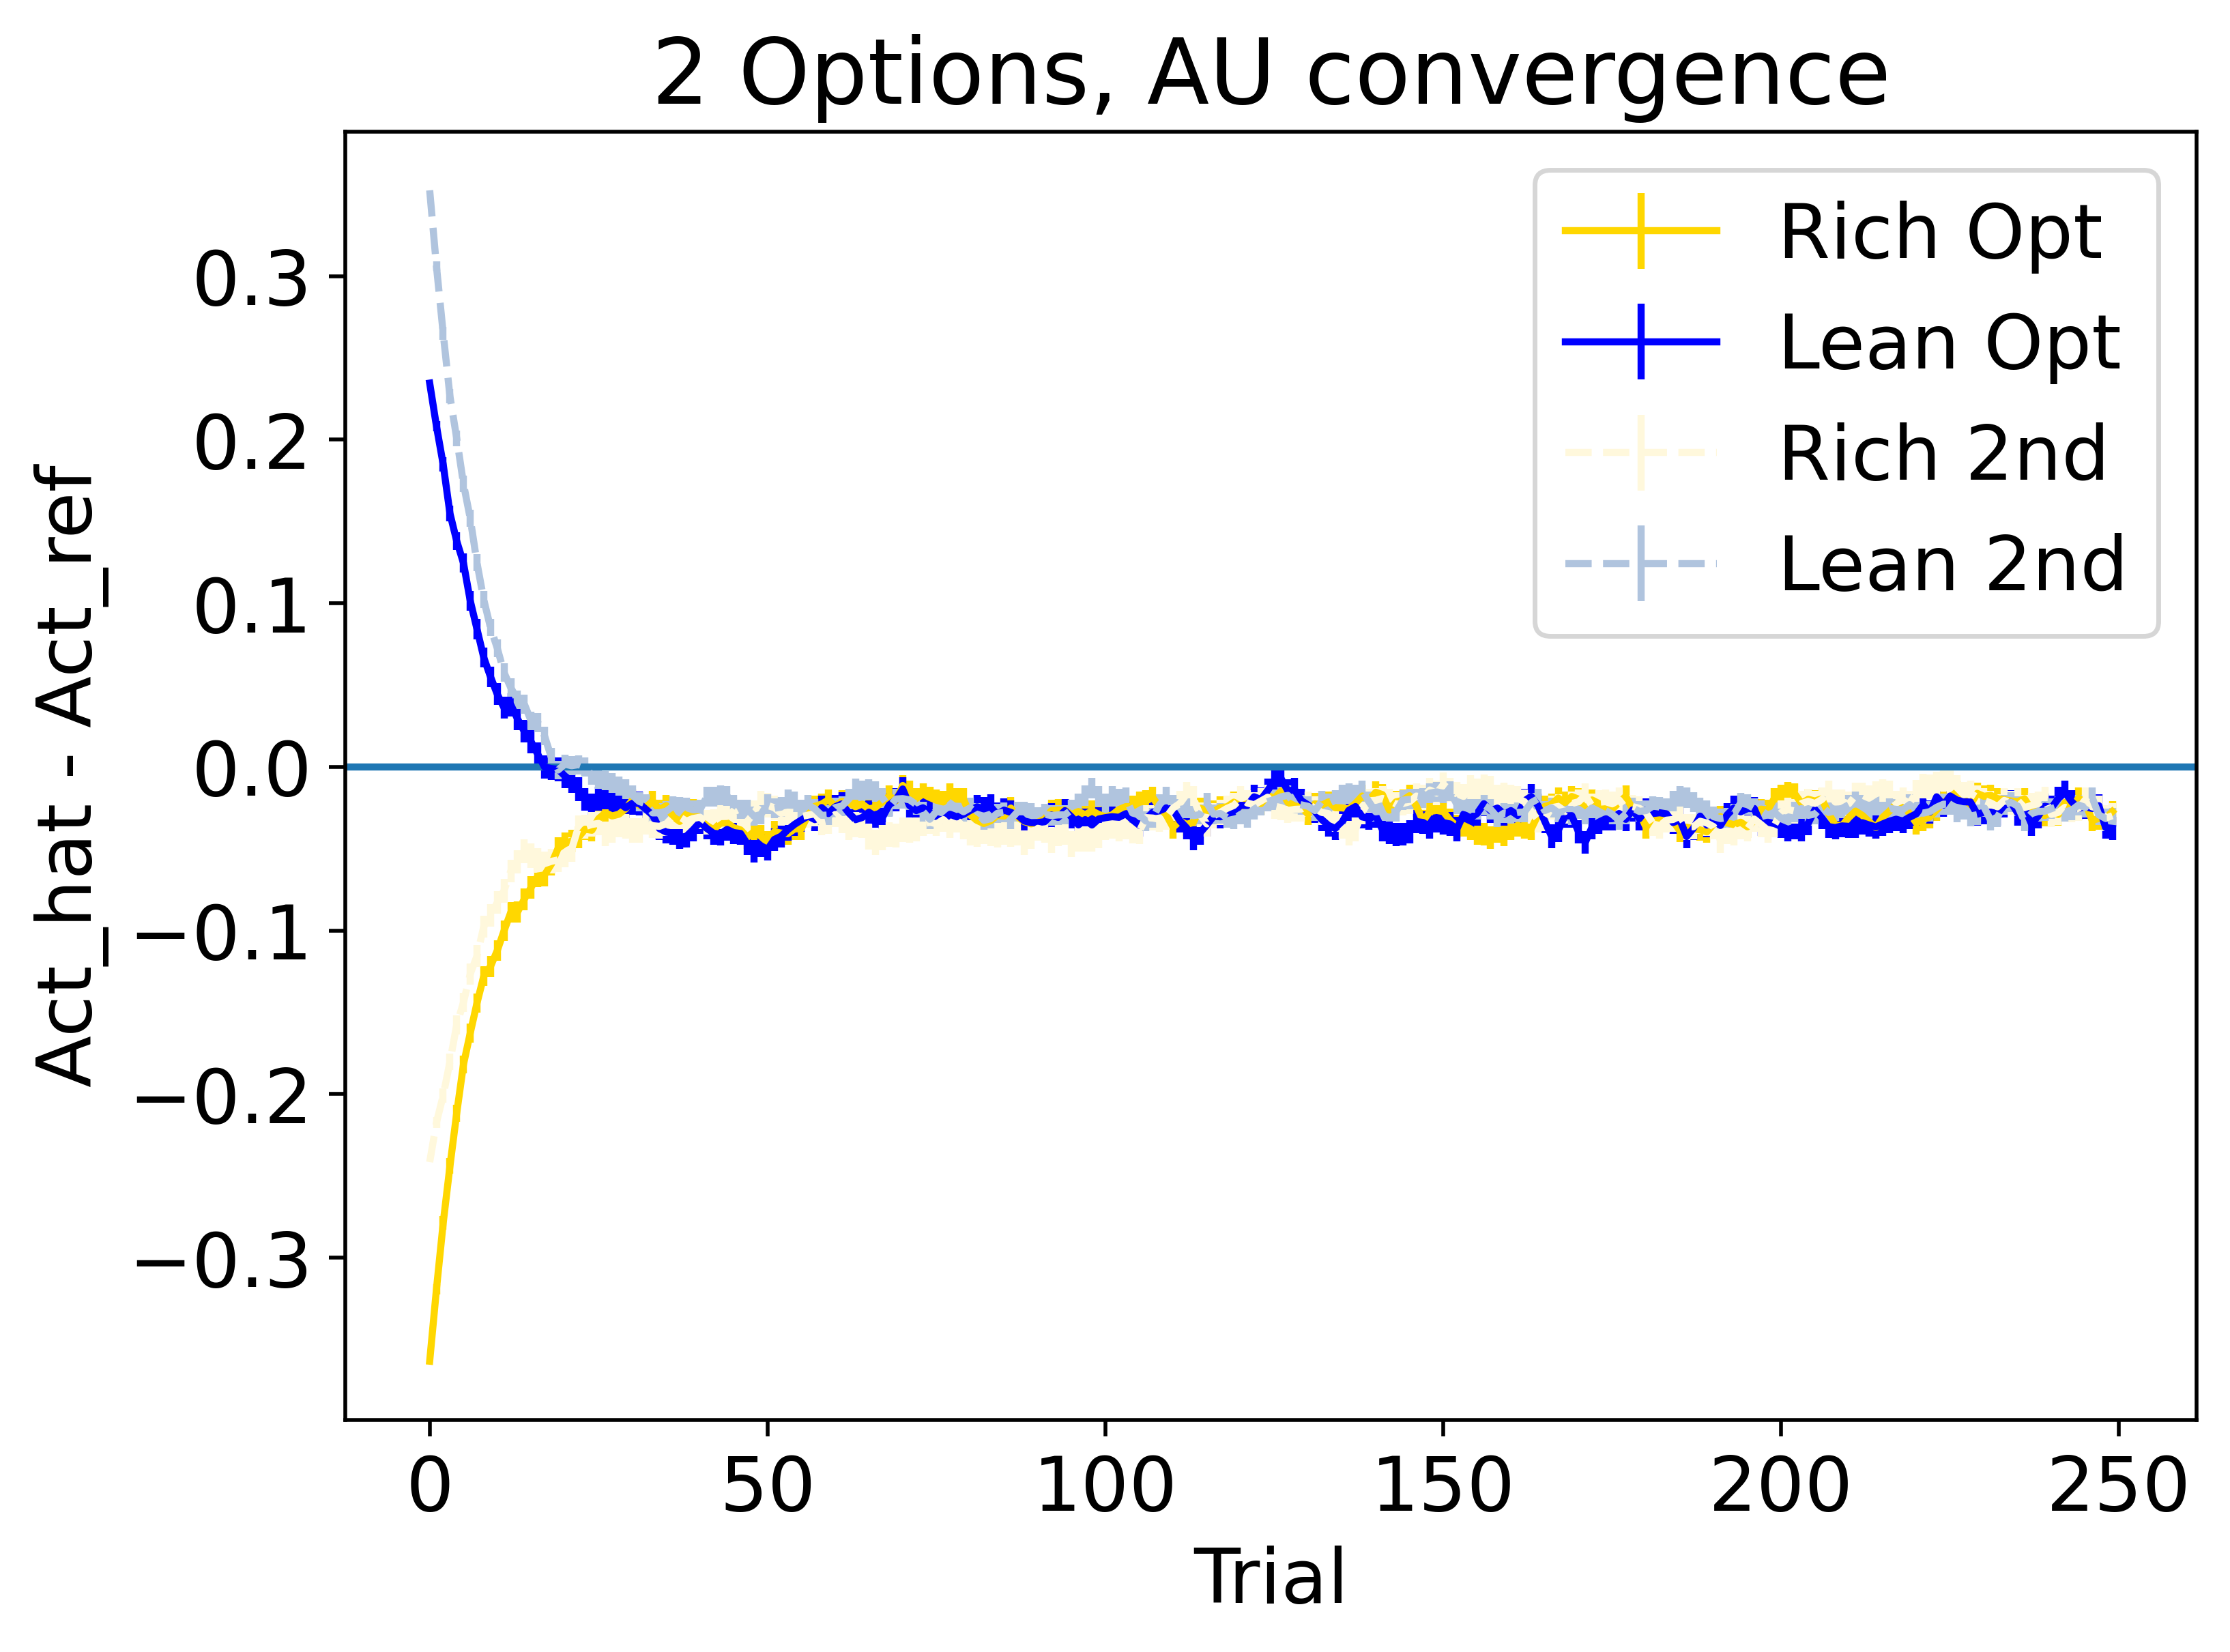

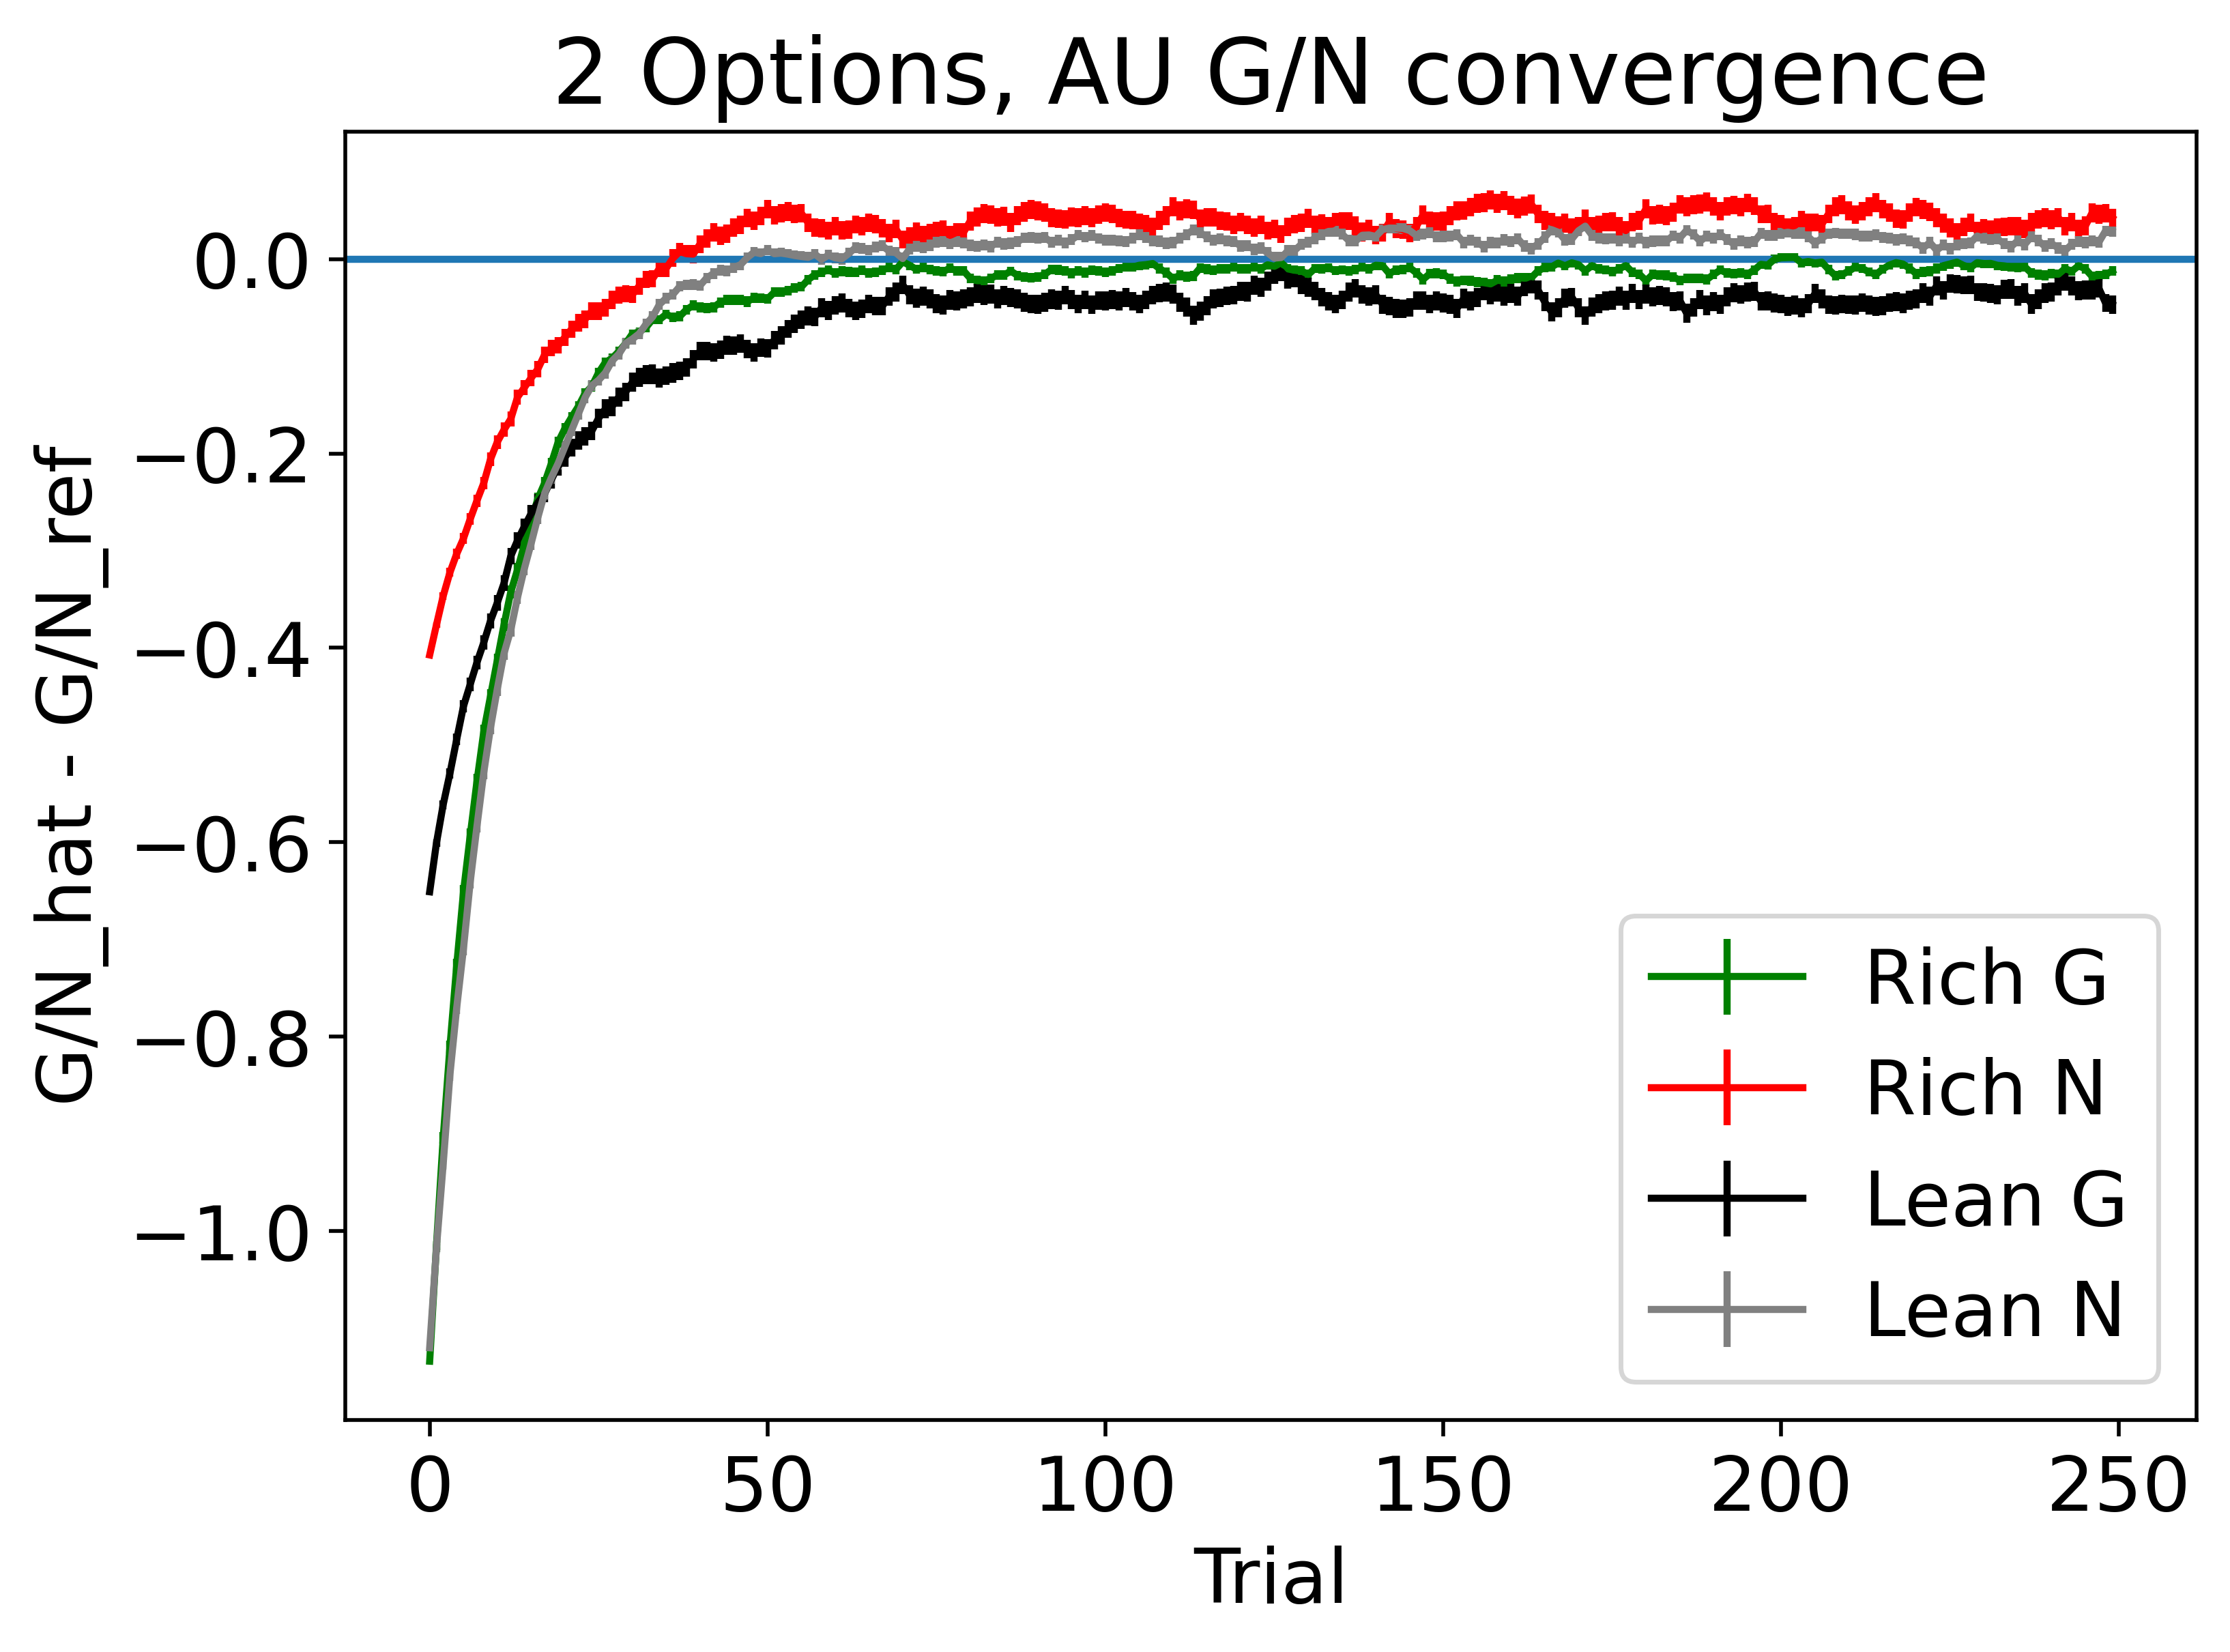

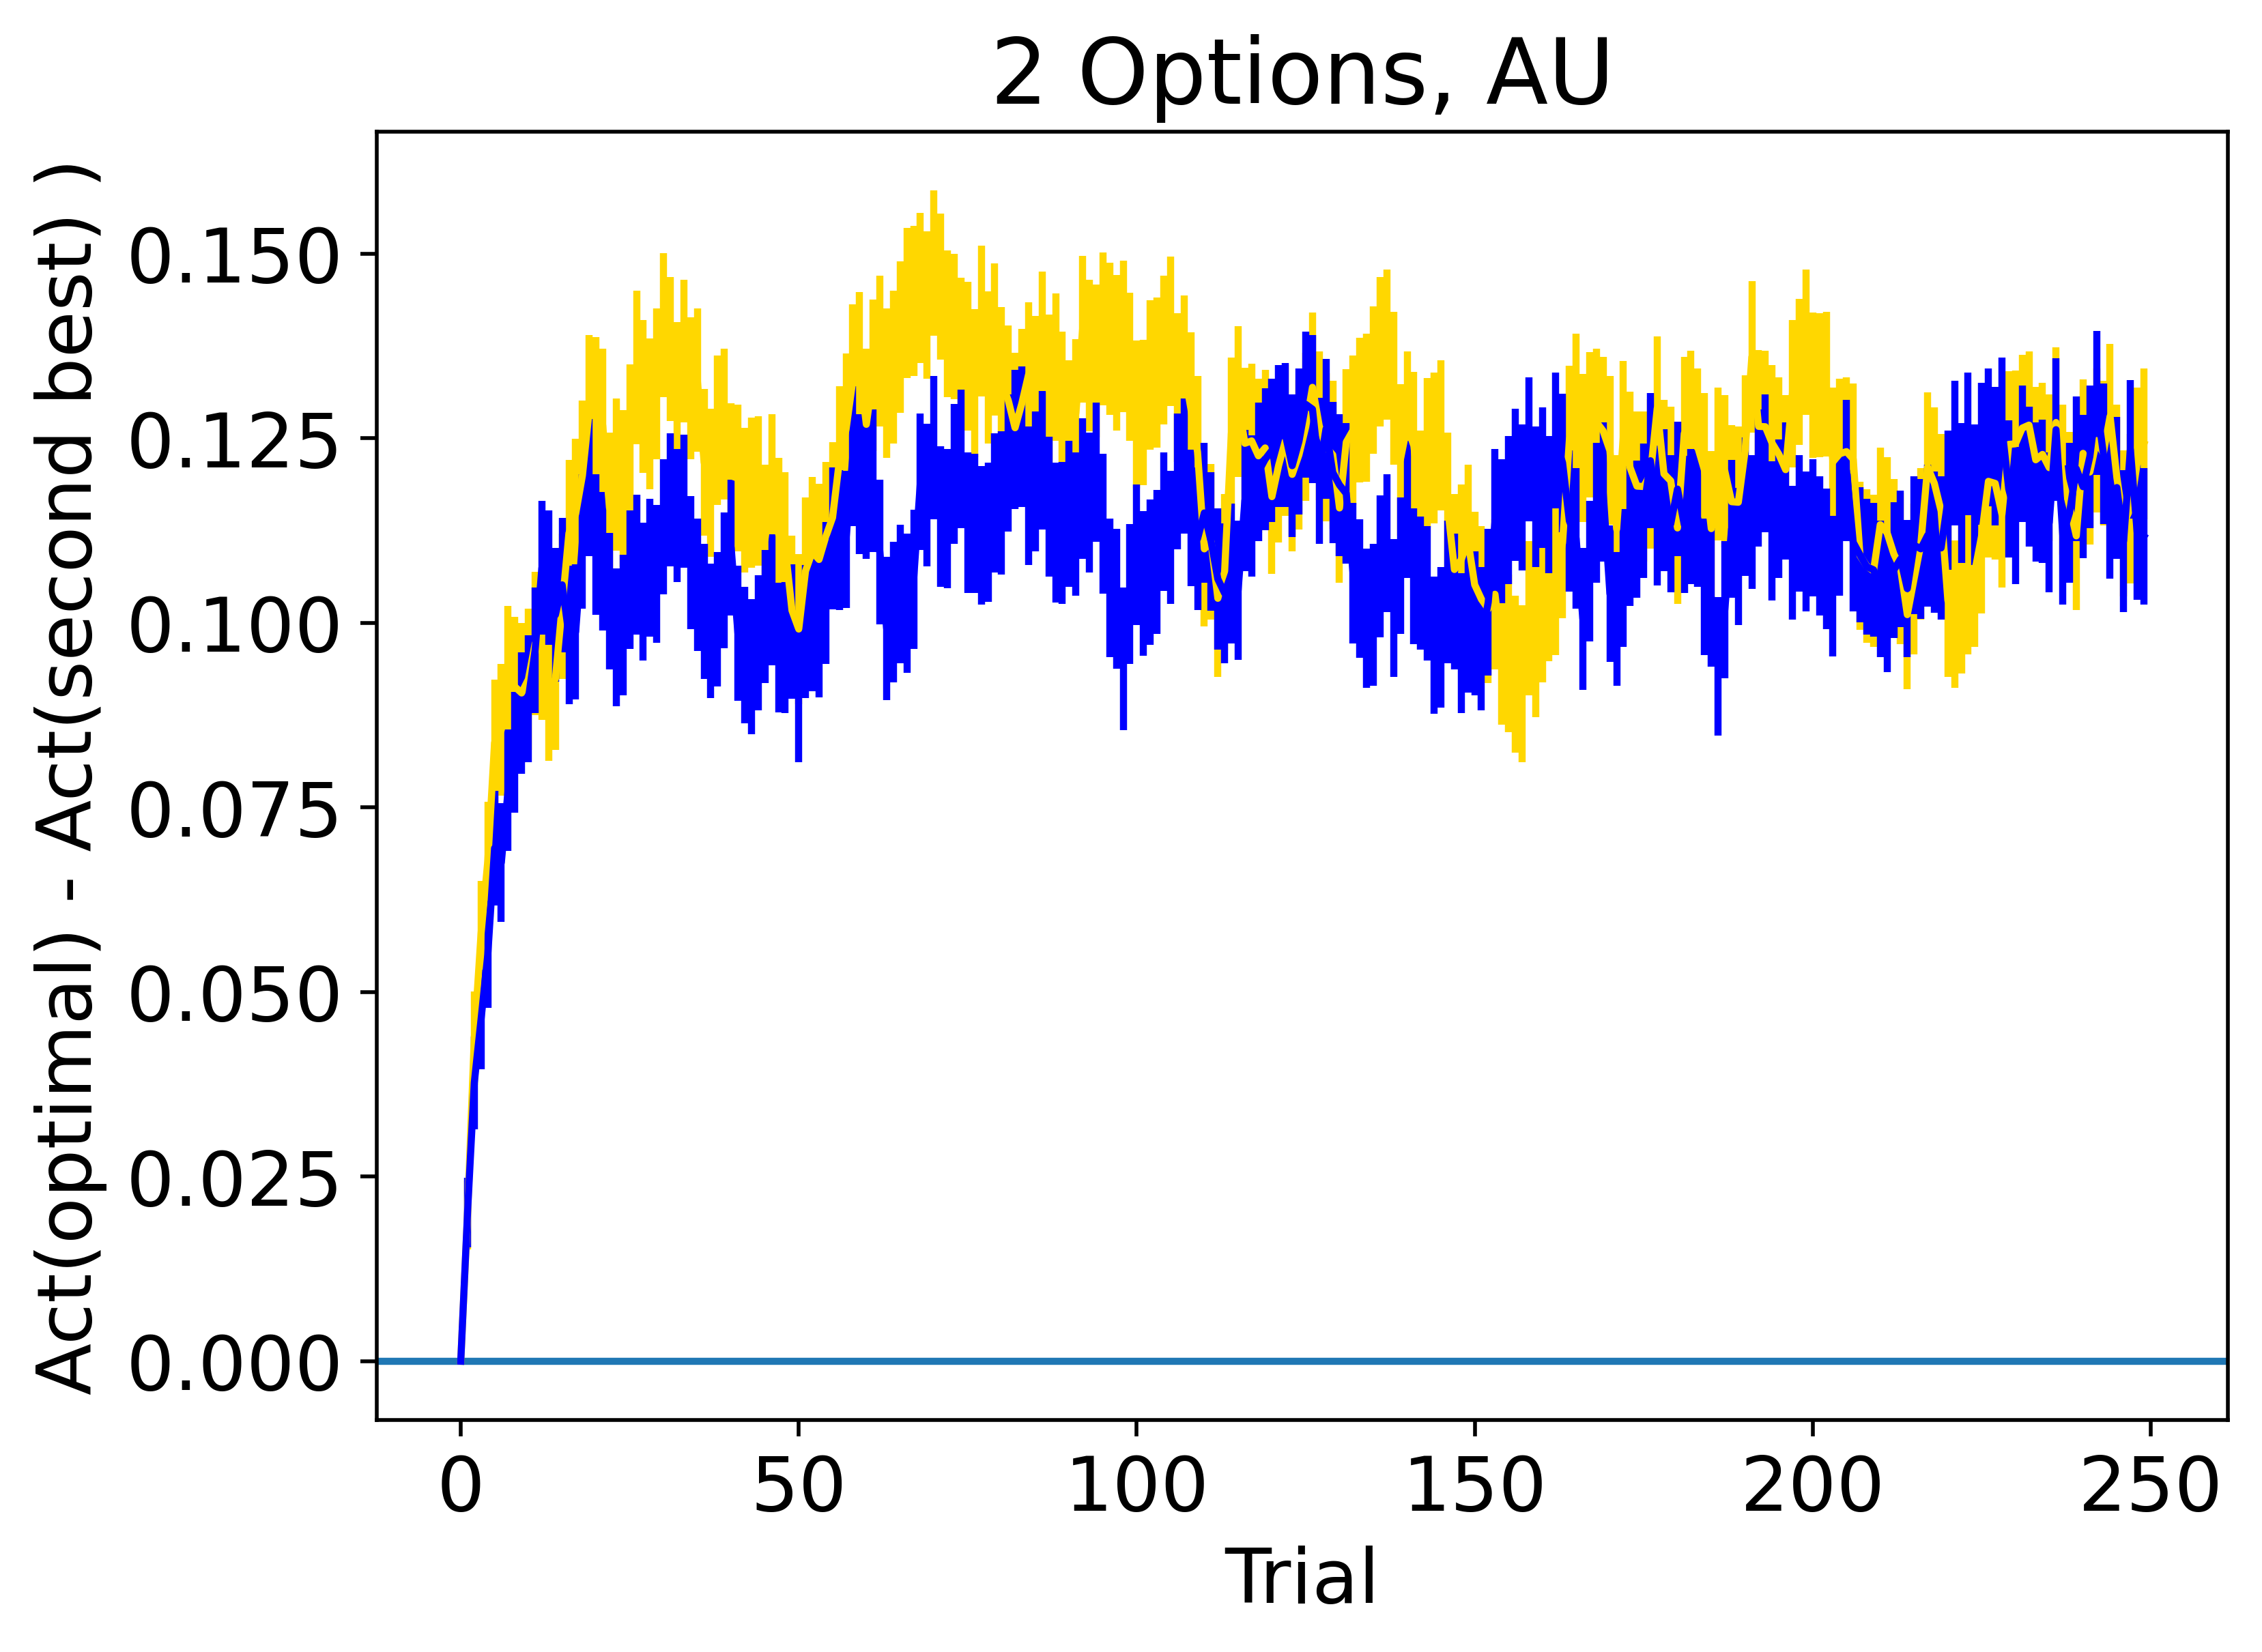

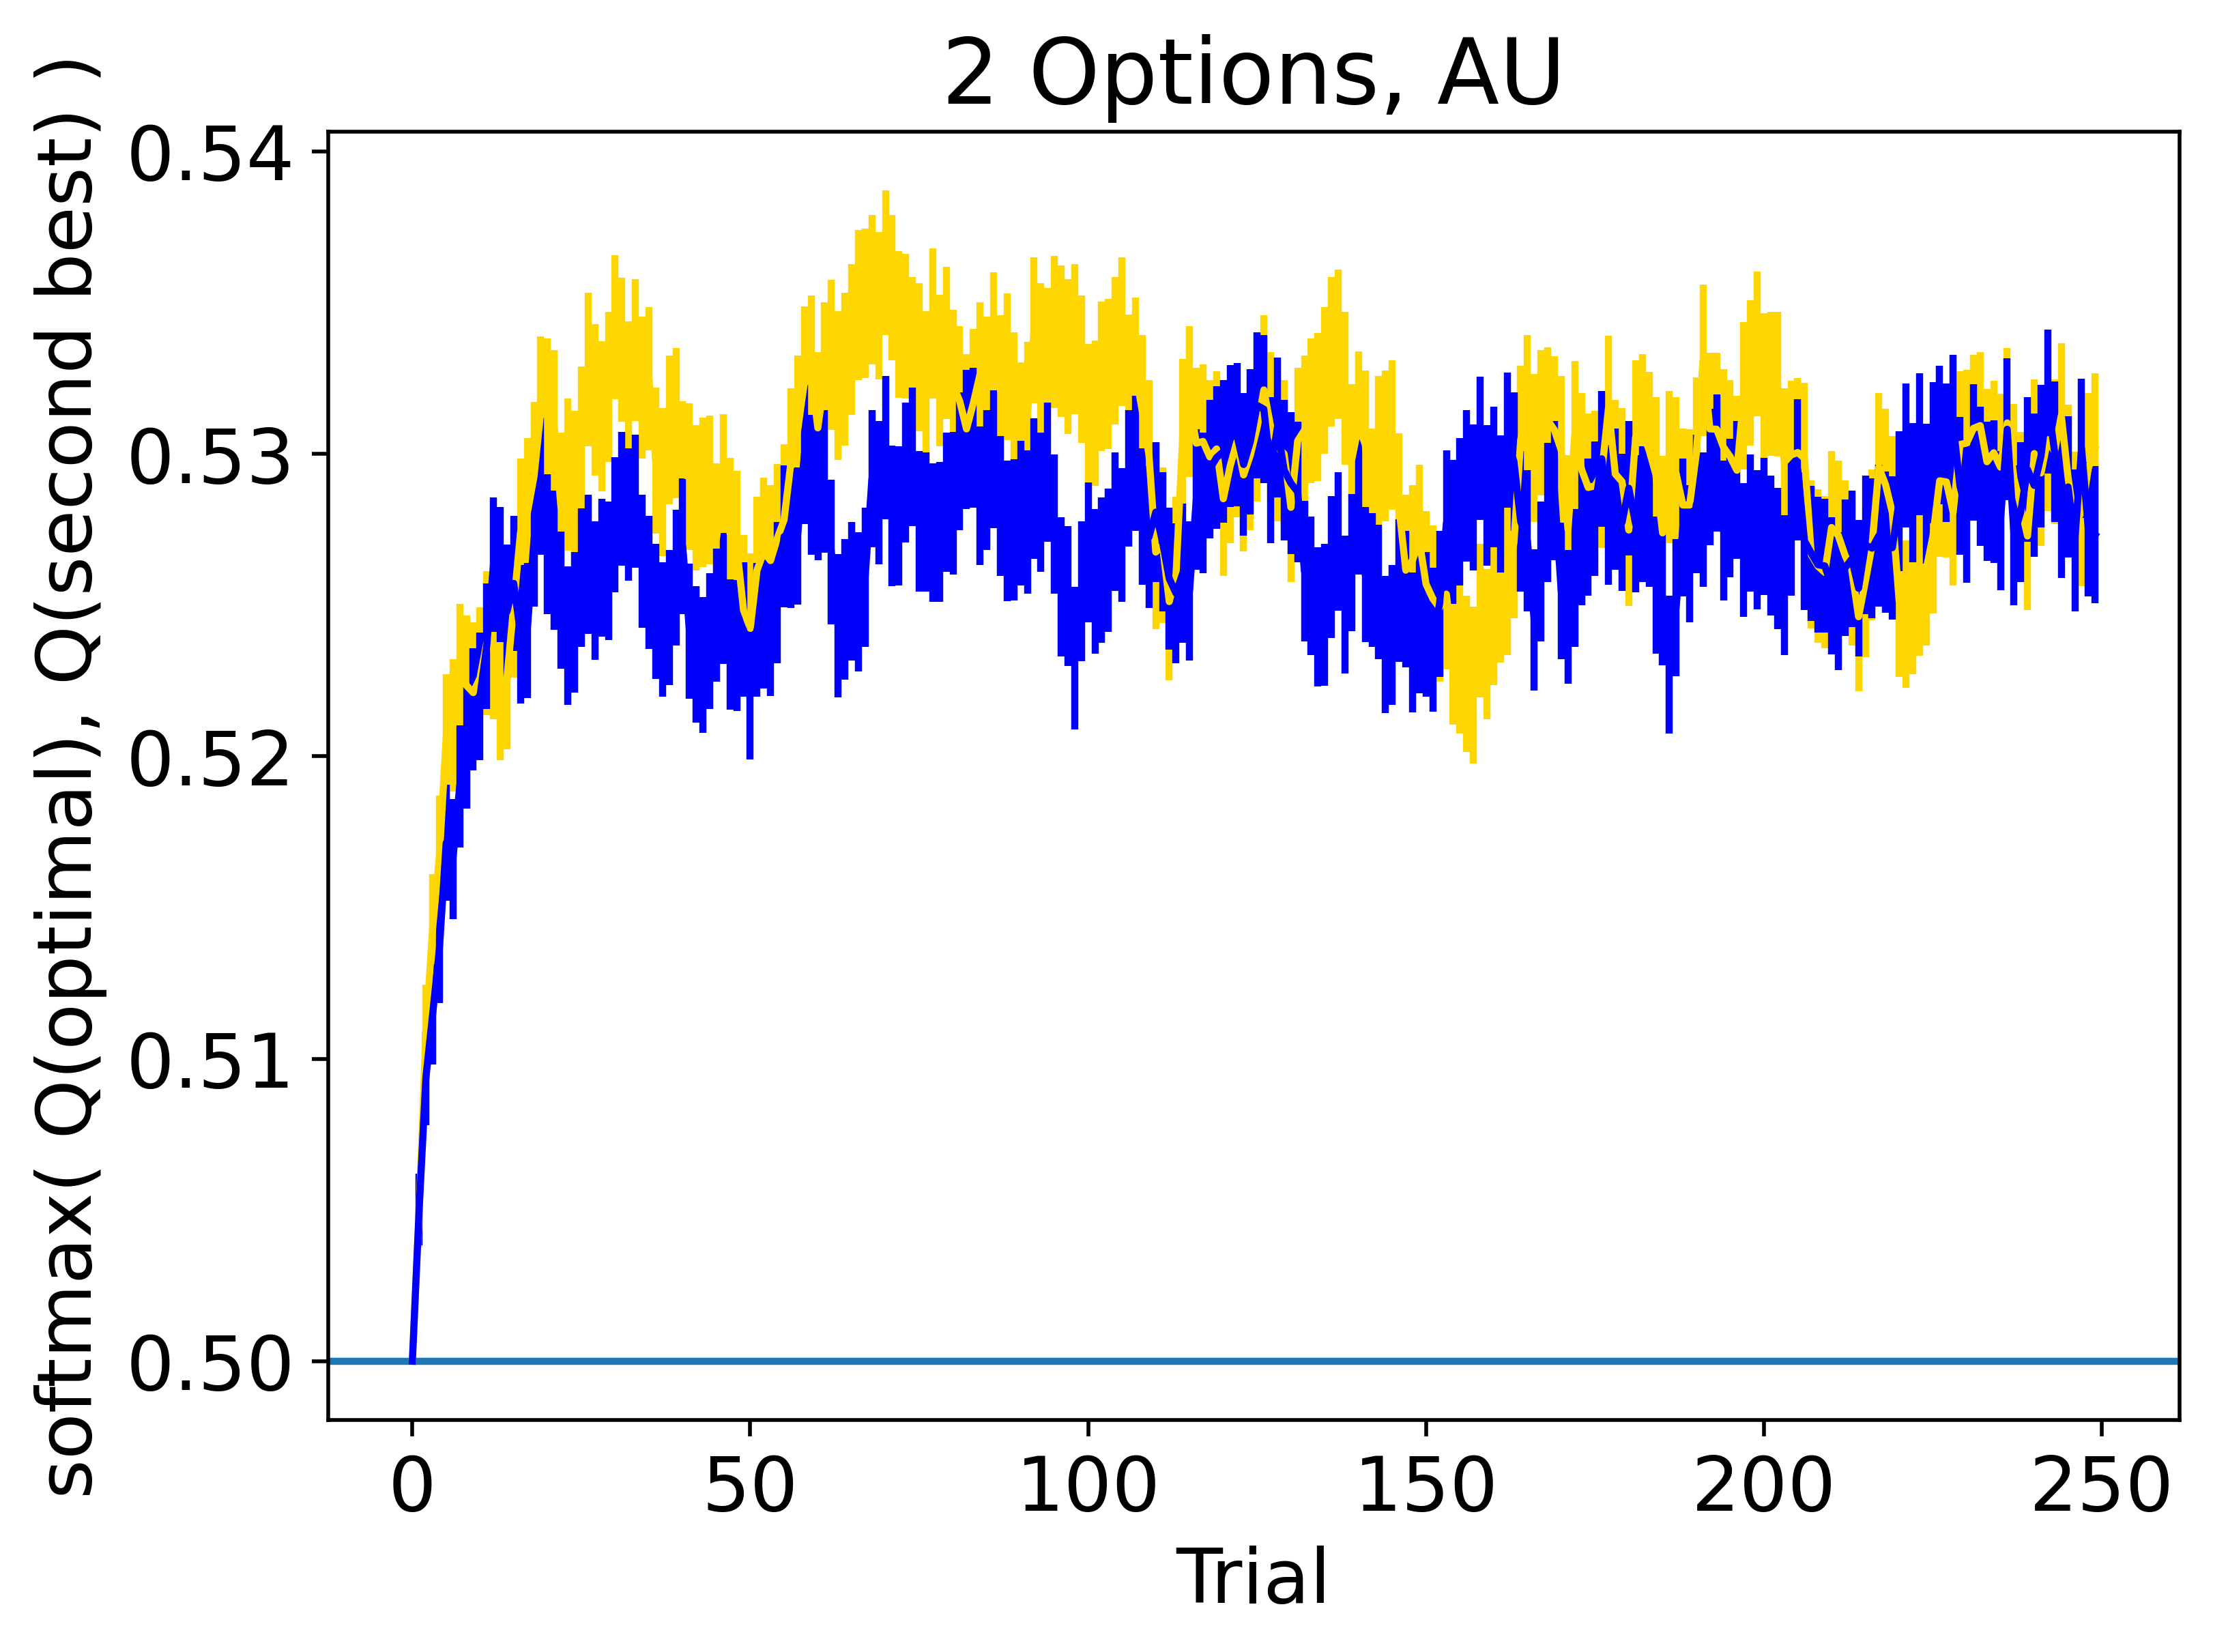

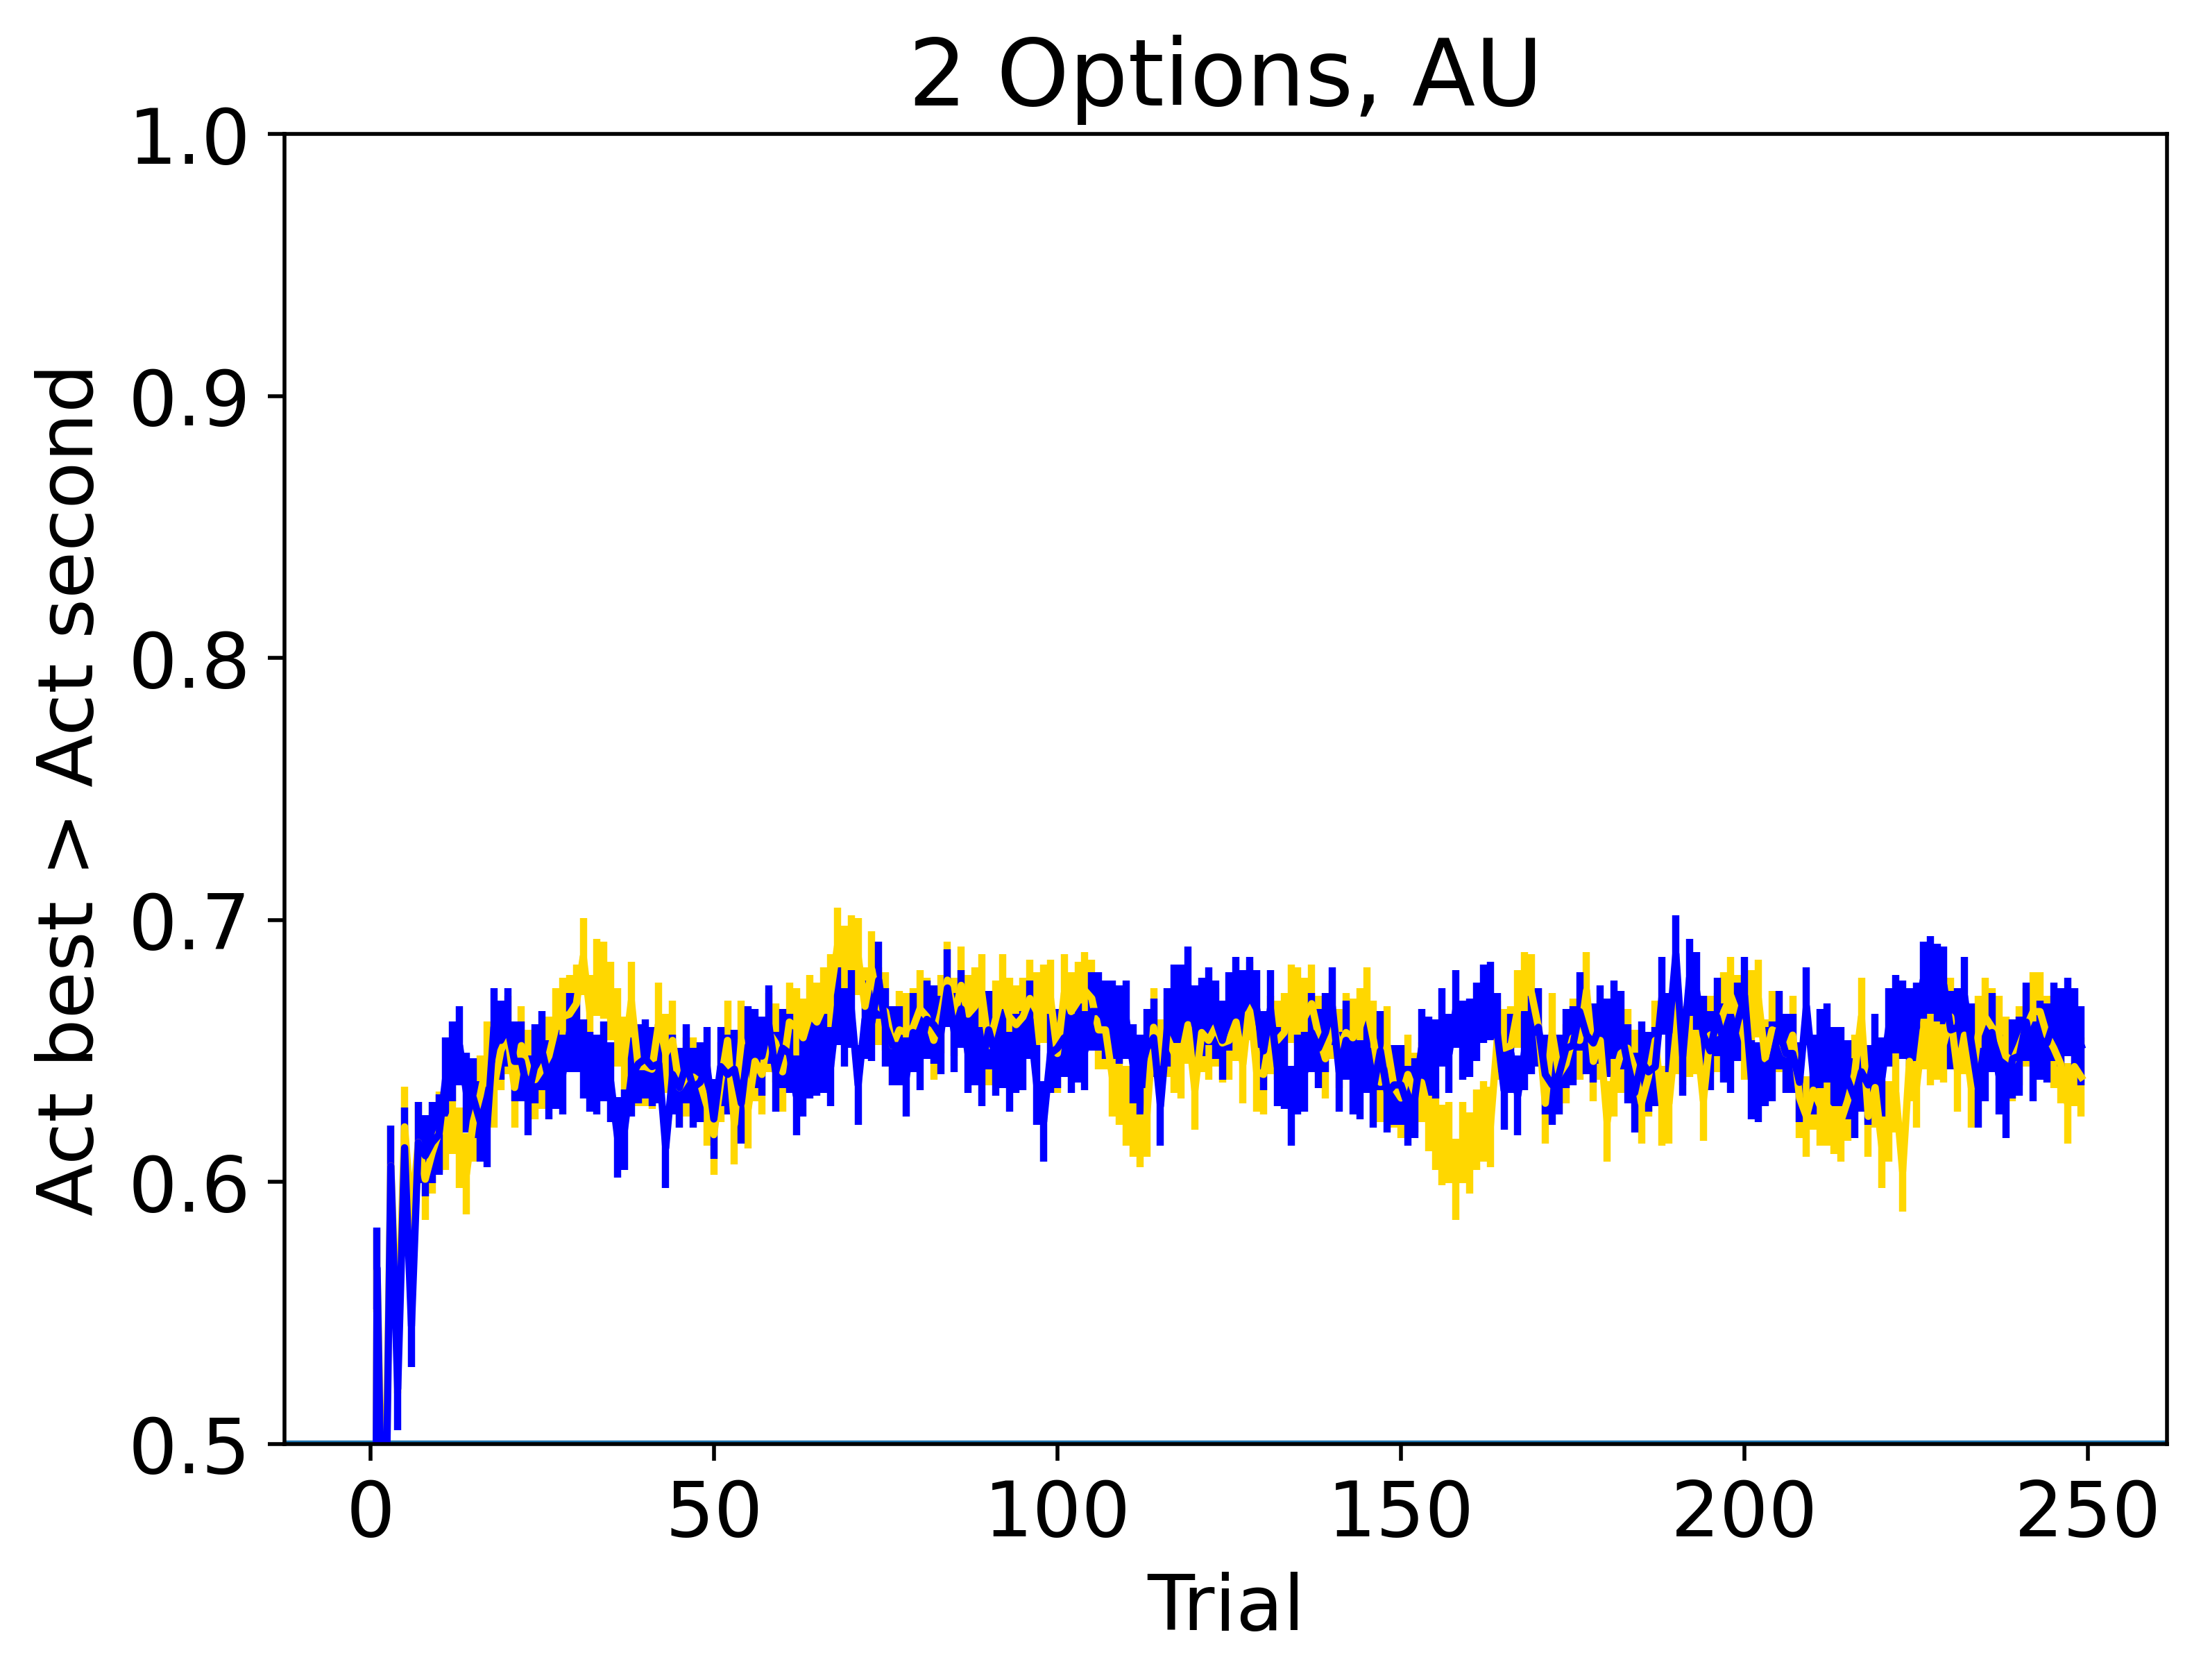

In [207]:
r_convergence = np.zeros([n_states,n_trials+1])
l_convergence = np.zeros([n_states,n_trials+1])

r_convergence_second = np.zeros([n_states,n_trials])
l_convergence_second = np.zeros([n_states,n_trials])

r_convergence_G = np.zeros([n_states,n_trials+1])
r_convergence_N = np.zeros([n_states,n_trials+1])
l_convergence_G = np.zeros([n_states,n_trials+1])
l_convergence_N = np.zeros([n_states,n_trials+1])


r_SM = np.zeros([n_states,n_trials])
l_SM = np.zeros([n_states,n_trials])

r_ag = np.zeros([n_states,n_trials])
l_ag = np.zeros([n_states,n_trials])

r_order = np.zeros([n_states,n_trials])
l_order = np.zeros([n_states,n_trials])

for i in np.arange(n_states):
    # difference from ground truth for optimal action
    r_state = R_states_Bogacz[i]
    r_err = .5*(r_state.QG[:,0] - r_state.QN[:,0]) - r_ref    
    r_convergence[i,:] = r_err

    l_state = L_states_Bogacz[i]
    l_err = .5*(l_state.QG[:,0] - l_state.QN[:,0]) - l_ref
    l_convergence[i,:] = l_err

    # difference from ground truth for optimal action - G/N
    r_state = R_states_Bogacz[i]
    r_err = r_state.QG[:,0] - r_ref_G    
    r_convergence_G[i,:] = r_err
    r_err = r_state.QN[:,0] - r_ref_N    
    r_convergence_N[i,:] = r_err

    l_state = L_states_Bogacz[i]
    l_err = l_state.QG[:,0] - l_ref_G    
    l_convergence_G[i,:] = l_err
    l_err = l_state.QN[:,0] - l_ref_N    
    l_convergence_N[i,:] = l_err

    # second best option
    r_second_best = second_best_SM(r_state)
    r_err = np.array([.5*(r_state.QG[idx,second] - r_state.QN[idx,second]) for idx,second in enumerate(r_second_best)]) - r_ref_second
    r_convergence_second[i,:] = r_err

    l_second_best = second_best_SM(l_state)
    l_err = np.array([.5*(l_state.QG[idx,second] - l_state.QN[idx,second]) for idx,second in enumerate(l_second_best)]) - l_ref_second
    l_convergence_second[i,:] = l_err

    # action gap
    r_SM[i,:] = np.array([softmax(beta*.5*(r_state.QG[idx,0] - r_state.QN[idx,0]),beta*.5*(r_state.QG[idx,second] - r_state.QN[idx,second])) for idx,second in enumerate(r_second_best)]) 
    l_SM[i,:] = np.array([softmax(beta*.5*(l_state.QG[idx,0] - l_state.QN[idx,0]),beta*.5*(l_state.QG[idx,second] - l_state.QN[idx,second])) for idx,second in enumerate(l_second_best)]) 

    # action gap
    r_ag[i,:] = np.array([.5*(r_state.QG[idx,0] - r_state.QN[idx,0]) - .5*(r_state.QG[idx,second] - r_state.QN[idx,second]) for idx,second in enumerate(r_second_best)]) 
    l_ag[i,:] = np.array([.5*(l_state.QG[idx,0] - l_state.QN[idx,0]) - .5*(l_state.QG[idx,second] - l_state.QN[idx,second]) for idx,second in enumerate(l_second_best)]) 

    # only consider ordering
    r_order[i,:] = np.array([int((r_state.QG[idx,0] - r_state.QN[idx,0]) > (r_state.QG[idx,second] - r_state.QN[idx,second])) for idx,second in enumerate(r_second_best)]) 
    l_order[i,:] = np.array([int((l_state.QG[idx,0] - l_state.QN[idx,0]) > (l_state.QG[idx,second] - l_state.QN[idx,second])) for idx,second in enumerate(l_second_best)]) 


r_conv_mean = np.mean(r_convergence,axis=0)
r_conv_sem = stats.sem(r_convergence)
l_conv_mean = np.mean(l_convergence,axis=0)
l_conv_sem = stats.sem(l_convergence)

r_conv_G_mean = np.mean(r_convergence_G,axis=0)
r_conv_G_sem = stats.sem(r_convergence_G)
l_conv_G_mean = np.mean(l_convergence_G,axis=0)
l_conv_G_sem = stats.sem(l_convergence_G)

r_conv_N_mean = np.mean(r_convergence_N,axis=0)
r_conv_N_sem = stats.sem(r_convergence_N)
l_conv_N_mean = np.mean(l_convergence_N,axis=0)
l_conv_N_sem = stats.sem(l_convergence_N)

# second best
r_conv_sec_mean = np.mean(r_convergence_second,axis=0)
r_conv_sec_sem = stats.sem(r_convergence_second)
l_conv_sec_mean = np.mean(l_convergence_second,axis=0)
l_conv_sec_sem = stats.sem(l_convergence_second)


# plt the things
xaxis = np.arange(n_trials)
fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU convergence" %(complexity))
axs.set_ylabel("Act_hat - Act_ref")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_conv_mean[0:n_trials],yerr=r_conv_sem[0:n_trials], c = "gold")
axs.errorbar(xaxis,l_conv_mean[0:n_trials],yerr=l_conv_sem[0:n_trials], c = "blue")
axs.errorbar(xaxis,r_conv_sec_mean[0:n_trials],yerr=r_conv_sec_sem[0:n_trials], c = "cornsilk", linestyle = "dashed")
axs.errorbar(xaxis,l_conv_sec_mean[0:n_trials],yerr=l_conv_sec_sem[0:n_trials], c = "lightsteelblue", linestyle = "dashed")
axs.legend(["Rich Opt","Lean Opt","Rich 2nd","Lean 2nd"])
axs.axhline(y=0)

# G and N
fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU G/N convergence" %(complexity))
axs.set_ylabel("G/N_hat - G/N_ref")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_conv_G_mean[0:n_trials],yerr=r_conv_G_sem[0:n_trials], c = "green")
axs.errorbar(xaxis,r_conv_N_mean[0:n_trials],yerr=r_conv_N_sem[0:n_trials], c = "red")
axs.errorbar(xaxis,l_conv_G_mean[0:n_trials],yerr=l_conv_G_sem[0:n_trials], c = "black")
axs.errorbar(xaxis,l_conv_N_mean[0:n_trials],yerr=l_conv_N_sem[0:n_trials], c = "grey")
axs.legend(["Rich G","Rich N","Lean G","Lean N"])
axs.axhline(y=0)


# action gap 
r_ag_mean = np.mean(r_ag,axis=0)
r_ag_sem = stats.sem(r_ag)
l_ag_mean = np.mean(l_ag,axis=0)
l_ag_sem = stats.sem(l_ag)


fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU" %(complexity))
axs.set_ylabel("Act(optimal) - Act(second best) )")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_ag_mean,yerr=r_ag_sem, c = "gold")
axs.errorbar(xaxis,l_ag_mean,yerr=l_ag_sem, c = "blue")
axs.axhline(y=0.0)

# action gap 
r_SM_mean = np.mean(r_SM,axis=0)
r_SM_sem = stats.sem(r_SM)
l_SM_mean = np.mean(l_SM,axis=0)
l_SM_sem = stats.sem(l_SM)


fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU" %(complexity))
axs.set_ylabel("softmax( Q(optimal), Q(second best) )")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_SM_mean,yerr=r_SM_sem, c = "gold")
axs.errorbar(xaxis,l_SM_mean,yerr=l_SM_sem, c = "blue")
axs.axhline(y=0.5)

# action gap - G/N sign
r_order_mean = np.mean(r_order,axis=0)
r_order_sem = stats.sem(r_order)
l_order_mean = np.mean(l_order,axis=0)
l_order_sem = stats.sem(l_order)


fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU" %(complexity))
axs.set_ylabel("Act best > Act second")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_order_mean,yerr=r_order_sem, c = "gold")
axs.errorbar(xaxis,l_order_mean,yerr=l_order_sem, c = "blue")
axs.axhline(y=0.5)
axs.set_ylim([0.5,1.0])

In [208]:
# Full info analysis

r_FULL_convergence = np.zeros([n_states,n_trials+1])
l_FULL_convergence = np.zeros([n_states,n_trials+1])

r_FULL_convergence_second = np.zeros([n_states,n_trials+1])
l_FULL_convergence_second = np.zeros([n_states,n_trials+1])

r_FULL_convergence_G = np.zeros([n_states,n_trials+1])
r_FULL_convergence_N = np.zeros([n_states,n_trials+1])
l_FULL_convergence_G = np.zeros([n_states,n_trials+1])
l_FULL_convergence_N = np.zeros([n_states,n_trials+1])


r_FULL_SM = np.zeros([n_states,n_trials])
l_FULL_SM = np.zeros([n_states,n_trials])

r_FULL_order = np.zeros([n_states,n_trials])
l_FULL_order = np.zeros([n_states,n_trials])

r_FULL_ag = np.zeros([n_states,n_trials])
l_FULL_ag = np.zeros([n_states,n_trials])

for i in np.arange(n_states):
    # difference from ground truth for optimal action
    r_state = R_states_Bogacz_ref[i]
    r_err = .5*(r_state.QG[:,0] - r_state.QN[:,0]) - r_ref    
    r_FULL_convergence[i,:] = r_err

    l_state = L_states_Bogacz_ref[i]
    l_err = .5*(l_state.QG[:,0] - l_state.QN[:,0]) - l_ref
    l_FULL_convergence[i,:] = l_err

    # difference from ground truth for optimal action - G/N
    r_state = R_states_Bogacz_ref[i]
    r_err = r_state.QG[:,0] - r_ref_G    
    r_FULL_convergence_G[i,:] = r_err
    r_err = r_state.QN[:,0] - r_ref_N    
    r_FULL_convergence_N[i,:] = r_err

    l_state = L_states_Bogacz_ref[i]
    l_err = l_state.QG[:,0] - l_ref_G    
    l_FULL_convergence_G[i,:] = l_err
    l_err = l_state.QN[:,0] - l_ref_N    
    l_FULL_convergence_N[i,:] = l_err

    # second best option
    r_state_second = R_states_Bogacz_ref_second[i]
    r_err = .5*(r_state_second.QG[:,0] - r_state_second.QN[:,0]) - r_ref_second
    r_FULL_convergence_second[i,:] = r_err

    l_state_second = L_states_Bogacz_ref_second[i]
    l_err = .5*(l_state_second.QG[:,0] - l_state_second.QN[:,0]) - l_ref_second    
    l_FULL_convergence_second[i,:] = l_err

    # action gap
    r_FULL_SM[i,:] = np.array([softmax(beta*.5*(r_state.QG[idx,0] - r_state.QN[idx,0]),beta*.5*(r_state_second.QG[idx,0] - r_state_second.QN[idx,0])) for idx in range(n_trials)]) 
    l_FULL_SM[i,:] = np.array([softmax(beta*.5*(l_state.QG[idx,0] - l_state.QN[idx,0]),beta*.5*(l_state_second.QG[idx,0] - l_state_second.QN[idx,0])) for idx in range(n_trials)]) 

    # only consider ordering
    r_FULL_order[i,:] = np.array([int((r_state.QG[idx,0] - r_state.QN[idx,0]) > (r_state_second.QG[idx,0] - r_state_second.QN[idx,0])) for idx in range(n_trials)]) 
    l_FULL_order[i,:] = np.array([int((l_state.QG[idx,0] - l_state.QN[idx,0]) > (l_state_second.QG[idx,0] - l_state_second.QN[idx,0])) for idx in range(n_trials)]) 

    r_FULL_ag[i,:] = np.array([0.5*(r_state.QG[idx,0] - r_state.QN[idx,0]) - 0.5*(r_state_second.QG[idx,0] - r_state_second.QN[idx,0]) for idx in range(n_trials)]) 
    l_FULL_ag[i,:] = np.array([0.5*(l_state.QG[idx,0] - l_state.QN[idx,0]) - 0.5*(l_state_second.QG[idx,0] - l_state_second.QN[idx,0]) for idx in range(n_trials)]) 


r_FULL_conv_mean = np.mean(r_FULL_convergence,axis=0)
r_FULL_conv_sem = stats.sem(r_FULL_convergence)
l_FULL_conv_mean = np.mean(l_FULL_convergence,axis=0)
l_FULL_conv_sem = stats.sem(l_FULL_convergence)

r_FULL_conv_G_mean = np.mean(r_FULL_convergence_G,axis=0)
r_FULL_conv_G_sem = stats.sem(r_FULL_convergence_G)
l_FULL_conv_G_mean = np.mean(l_FULL_convergence_G,axis=0)
l_FULL_conv_G_sem = stats.sem(l_FULL_convergence_G)

r_FULL_conv_N_mean = np.mean(r_FULL_convergence_N,axis=0)
r_FULL_conv_N_sem = stats.sem(r_FULL_convergence_N)
l_FULL_conv_N_mean = np.mean(l_FULL_convergence_N,axis=0)
l_FULL_conv_N_sem = stats.sem(l_FULL_convergence_N)

# second best
r_FULL_conv_sec_mean = np.mean(r_FULL_convergence_second,axis=0)
r_FULL_conv_sec_sem = stats.sem(r_FULL_convergence_second)
l_FULL_conv_sec_mean = np.mean(l_FULL_convergence_second,axis=0)
l_FULL_conv_sec_sem = stats.sem(l_FULL_convergence_second)


# plt the things
xaxis = np.arange(n_trials)
fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU convergence" %(complexity))
axs.set_ylabel("Act_hat - Act_ref")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_FULL_conv_mean[0:n_trials],yerr=r_FULL_conv_sem[0:n_trials], c = "gold")
axs.errorbar(xaxis,l_FULL_conv_mean[0:n_trials],yerr=l_FULL_conv_sem[0:n_trials], c = "blue")
axs.errorbar(xaxis,r_FULL_conv_sec_mean[0:n_trials],yerr=r_FULL_conv_sec_sem[0:n_trials], c = "cornsilk", linestyle = "dashed")
axs.errorbar(xaxis,l_FULL_conv_sec_mean[0:n_trials],yerr=l_FULL_conv_sec_sem[0:n_trials], c = "lightsteelblue", linestyle = "dashed")
axs.legend(["Rich Opt","Lean Opt","Rich 2nd","Lean 2nd"])
axs.axhline(y=0)

# G and N
fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU G/N convergence" %(complexity))
axs.set_ylabel("G/N_hat - G/N_ref")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_FULL_conv_G_mean[0:n_trials],yerr=r_FULL_conv_G_sem[0:n_trials], c = "green")
axs.errorbar(xaxis,r_FULL_conv_N_mean[0:n_trials],yerr=r_FULL_conv_N_sem[0:n_trials], c = "red")
axs.errorbar(xaxis,l_FULL_conv_G_mean[0:n_trials],yerr=l_FULL_conv_G_sem[0:n_trials], c = "black")
axs.errorbar(xaxis,l_FULL_conv_N_mean[0:n_trials],yerr=l_FULL_conv_N_sem[0:n_trials], c = "grey")
axs.legend(["Rich G","Rich N","Lean G","Lean N"])
axs.axhline(y=0)


# action gap 
r_FULL_SM_mean = np.mean(r_FULL_SM,axis=0)
r_FULL_SM_sem = stats.sem(r_FULL_SM)
l_FULL_SM_mean = np.mean(l_FULL_SM,axis=0)
l_FULL_SM_sem = stats.sem(l_FULL_SM)


fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU" %(complexity))
axs.set_ylabel("softmax( Q(optimal), Q(second best) )")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_FULL_SM_mean,yerr=r_FULL_SM_sem, c = "gold")
axs.errorbar(xaxis,l_FULL_SM_mean,yerr=l_FULL_SM_sem, c = "blue")
axs.axhline(y=0.5)

# action gap - G/N sign
r_FULL_order_mean = np.mean(r_FULL_order,axis=0)
r_FULL_order_sem = stats.sem(r_FULL_order)
l_FULL_order_mean = np.mean(l_FULL_order,axis=0)
l_FULL_order_sem = stats.sem(l_FULL_order)


fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU" %(complexity))
axs.set_ylabel("Act best > Act second")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_FULL_order_mean,yerr=r_FULL_order_sem, c = "gold")
axs.errorbar(xaxis,l_FULL_order_mean,yerr=l_FULL_order_sem, c = "blue")
axs.axhline(y=0.5)

# action gap - G/N sign
r_FULL_ag_mean = np.mean(r_FULL_ag,axis=0)
r_FULL_ag_sem = stats.sem(r_FULL_ag)
l_FULL_ag_mean = np.mean(l_FULL_ag,axis=0)
l_FULL_ag_sem = stats.sem(l_FULL_ag)


fig, axs = plt.subplots(figsize=(7, 5))
axs.set_title("%d Options, AU" %(complexity))
axs.set_ylabel("Act best - Act second")
axs.set_xlabel("Trial")
axs.errorbar(xaxis,r_FULL_ag_mean,yerr=r_FULL_ag_sem, c = "gold")
axs.errorbar(xaxis,l_FULL_ag_mean,yerr=l_FULL_ag_sem, c = "blue")
axs.axhline(y=0.0)

# For paper

In [ ]:
import importlib
importlib.reload(plot_dynamicsb)

<module 'plot_dynamicsb' from '/Users/ajaskir/Desktop/Desktop - CLPS-Jaskir18/Projects/FYP/code/bogacz/plot_dynamicsb.py'>

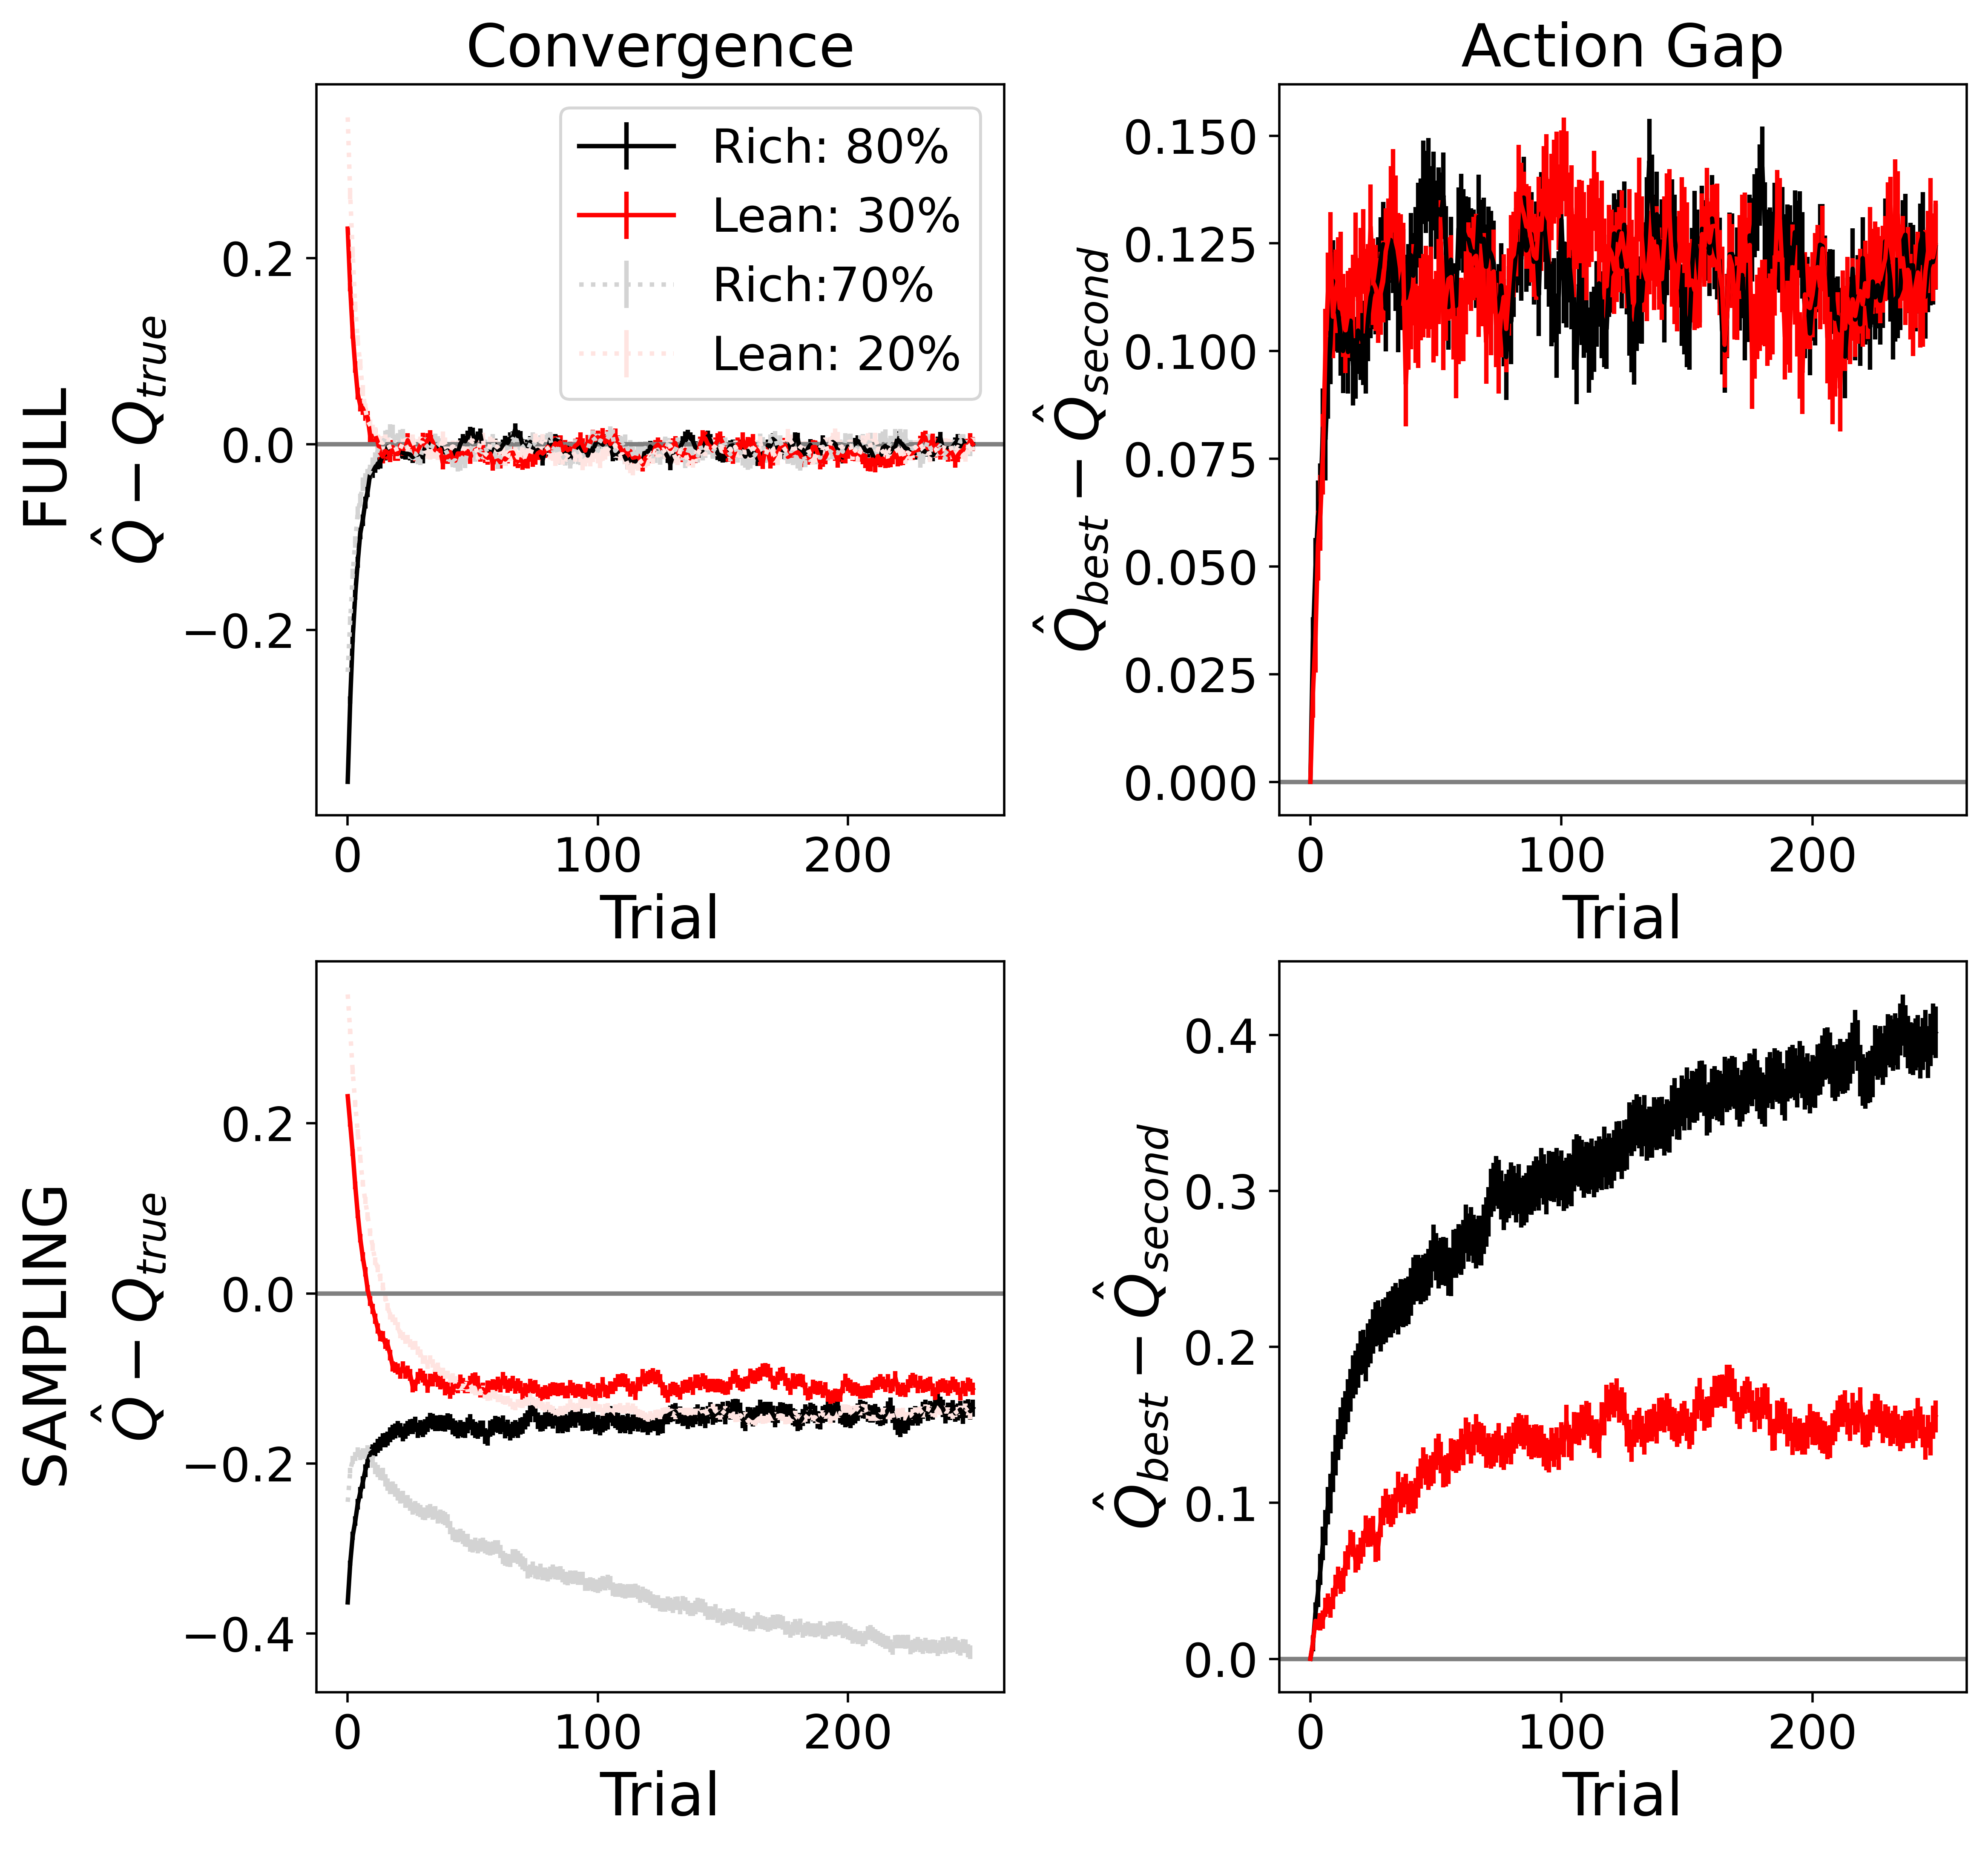

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(10, 10))
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.dpi'] = 500


fill_me = axs[0,0] # axs[row,col]
xaxis = np.arange(n_trials+1)
fill_me.set_title("Convergence", fontsize=20)
fill_me.set_ylabel("FULL \n $\^{Q} - Q_{true}$", fontsize=20)
fill_me.set_xlabel("Trial", fontsize=20)
fill_me.errorbar(xaxis,r_FULL_conv_mean,yerr=r_FULL_conv_sem, c = "black")
fill_me.errorbar(xaxis,l_FULL_conv_mean,yerr=l_FULL_conv_sem, c = "red")
fill_me.errorbar(xaxis,r_FULL_conv_sec_mean,yerr=r_FULL_conv_sec_sem, c = "lightgrey", linestyle="dotted")
fill_me.errorbar(xaxis,l_FULL_conv_sec_mean,yerr=l_FULL_conv_sec_sem, c = "mistyrose", linestyle="dotted")
fill_me.legend(["Rich: 80%","Lean: 30%","Rich:70%","Lean: 20%"],fontsize=16)
fill_me.axhline(y=0, color="grey")

fill_me = axs[1,0] # axs[row,col]
# fill_me.set_title("Q-learning, %d Options" %(complexity))
fill_me.set_ylabel("SAMPLING \n $\^{Q} - Q_{true}$", fontsize=20)
fill_me.set_xlabel("Trial", fontsize=20)
fill_me.errorbar(xaxis,r_conv_mean,yerr=r_conv_sem, c = "black")
fill_me.errorbar(xaxis,l_conv_mean,yerr=l_conv_sem, c = "red")
xaxis = np.arange(n_trials)
fill_me.errorbar(xaxis,r_conv_sec_mean,yerr=r_conv_sec_sem, c = "lightgrey", linestyle="dotted")
fill_me.errorbar(xaxis,l_conv_sec_mean,yerr=l_conv_sec_sem, c = "mistyrose", linestyle="dotted")
# fill_me.legend(["Rich Opt","Lean Opt","Rich 2nd","Lean 2nd"])
fill_me.axhline(y=0, color="grey")

fill_me = axs[0,1] # axs[row,col]
xaxis = np.arange(n_trials)
fill_me.set_title("Action Gap", fontsize=20)
fill_me.set_ylabel("$\^{Q}_{best} - \^{Q}_{second}$", fontsize=20)
fill_me.set_xlabel("Trial", fontsize=20)
fill_me.errorbar(xaxis,r_FULL_ag_mean,yerr=r_FULL_ag_sem, c = "black")
fill_me.errorbar(xaxis,l_FULL_ag_mean,yerr=l_FULL_ag_sem, c = "red")
fill_me.axhline(y=0, color="grey")

fill_me = axs[1,1] # axs[row,col]
fill_me.set_ylabel("$\^{Q}_{best} - \^{Q}_{second}$", fontsize=20)
fill_me.set_xlabel("Trial", fontsize=20)
fill_me.errorbar(xaxis,r_ag_mean,yerr=r_ag_sem, c = "black")
fill_me.errorbar(xaxis,l_ag_mean,yerr=l_ag_sem, c = "red")
fill_me.axhline(y=0,color="grey")

plt.subplots_adjust(wspace=0.4)


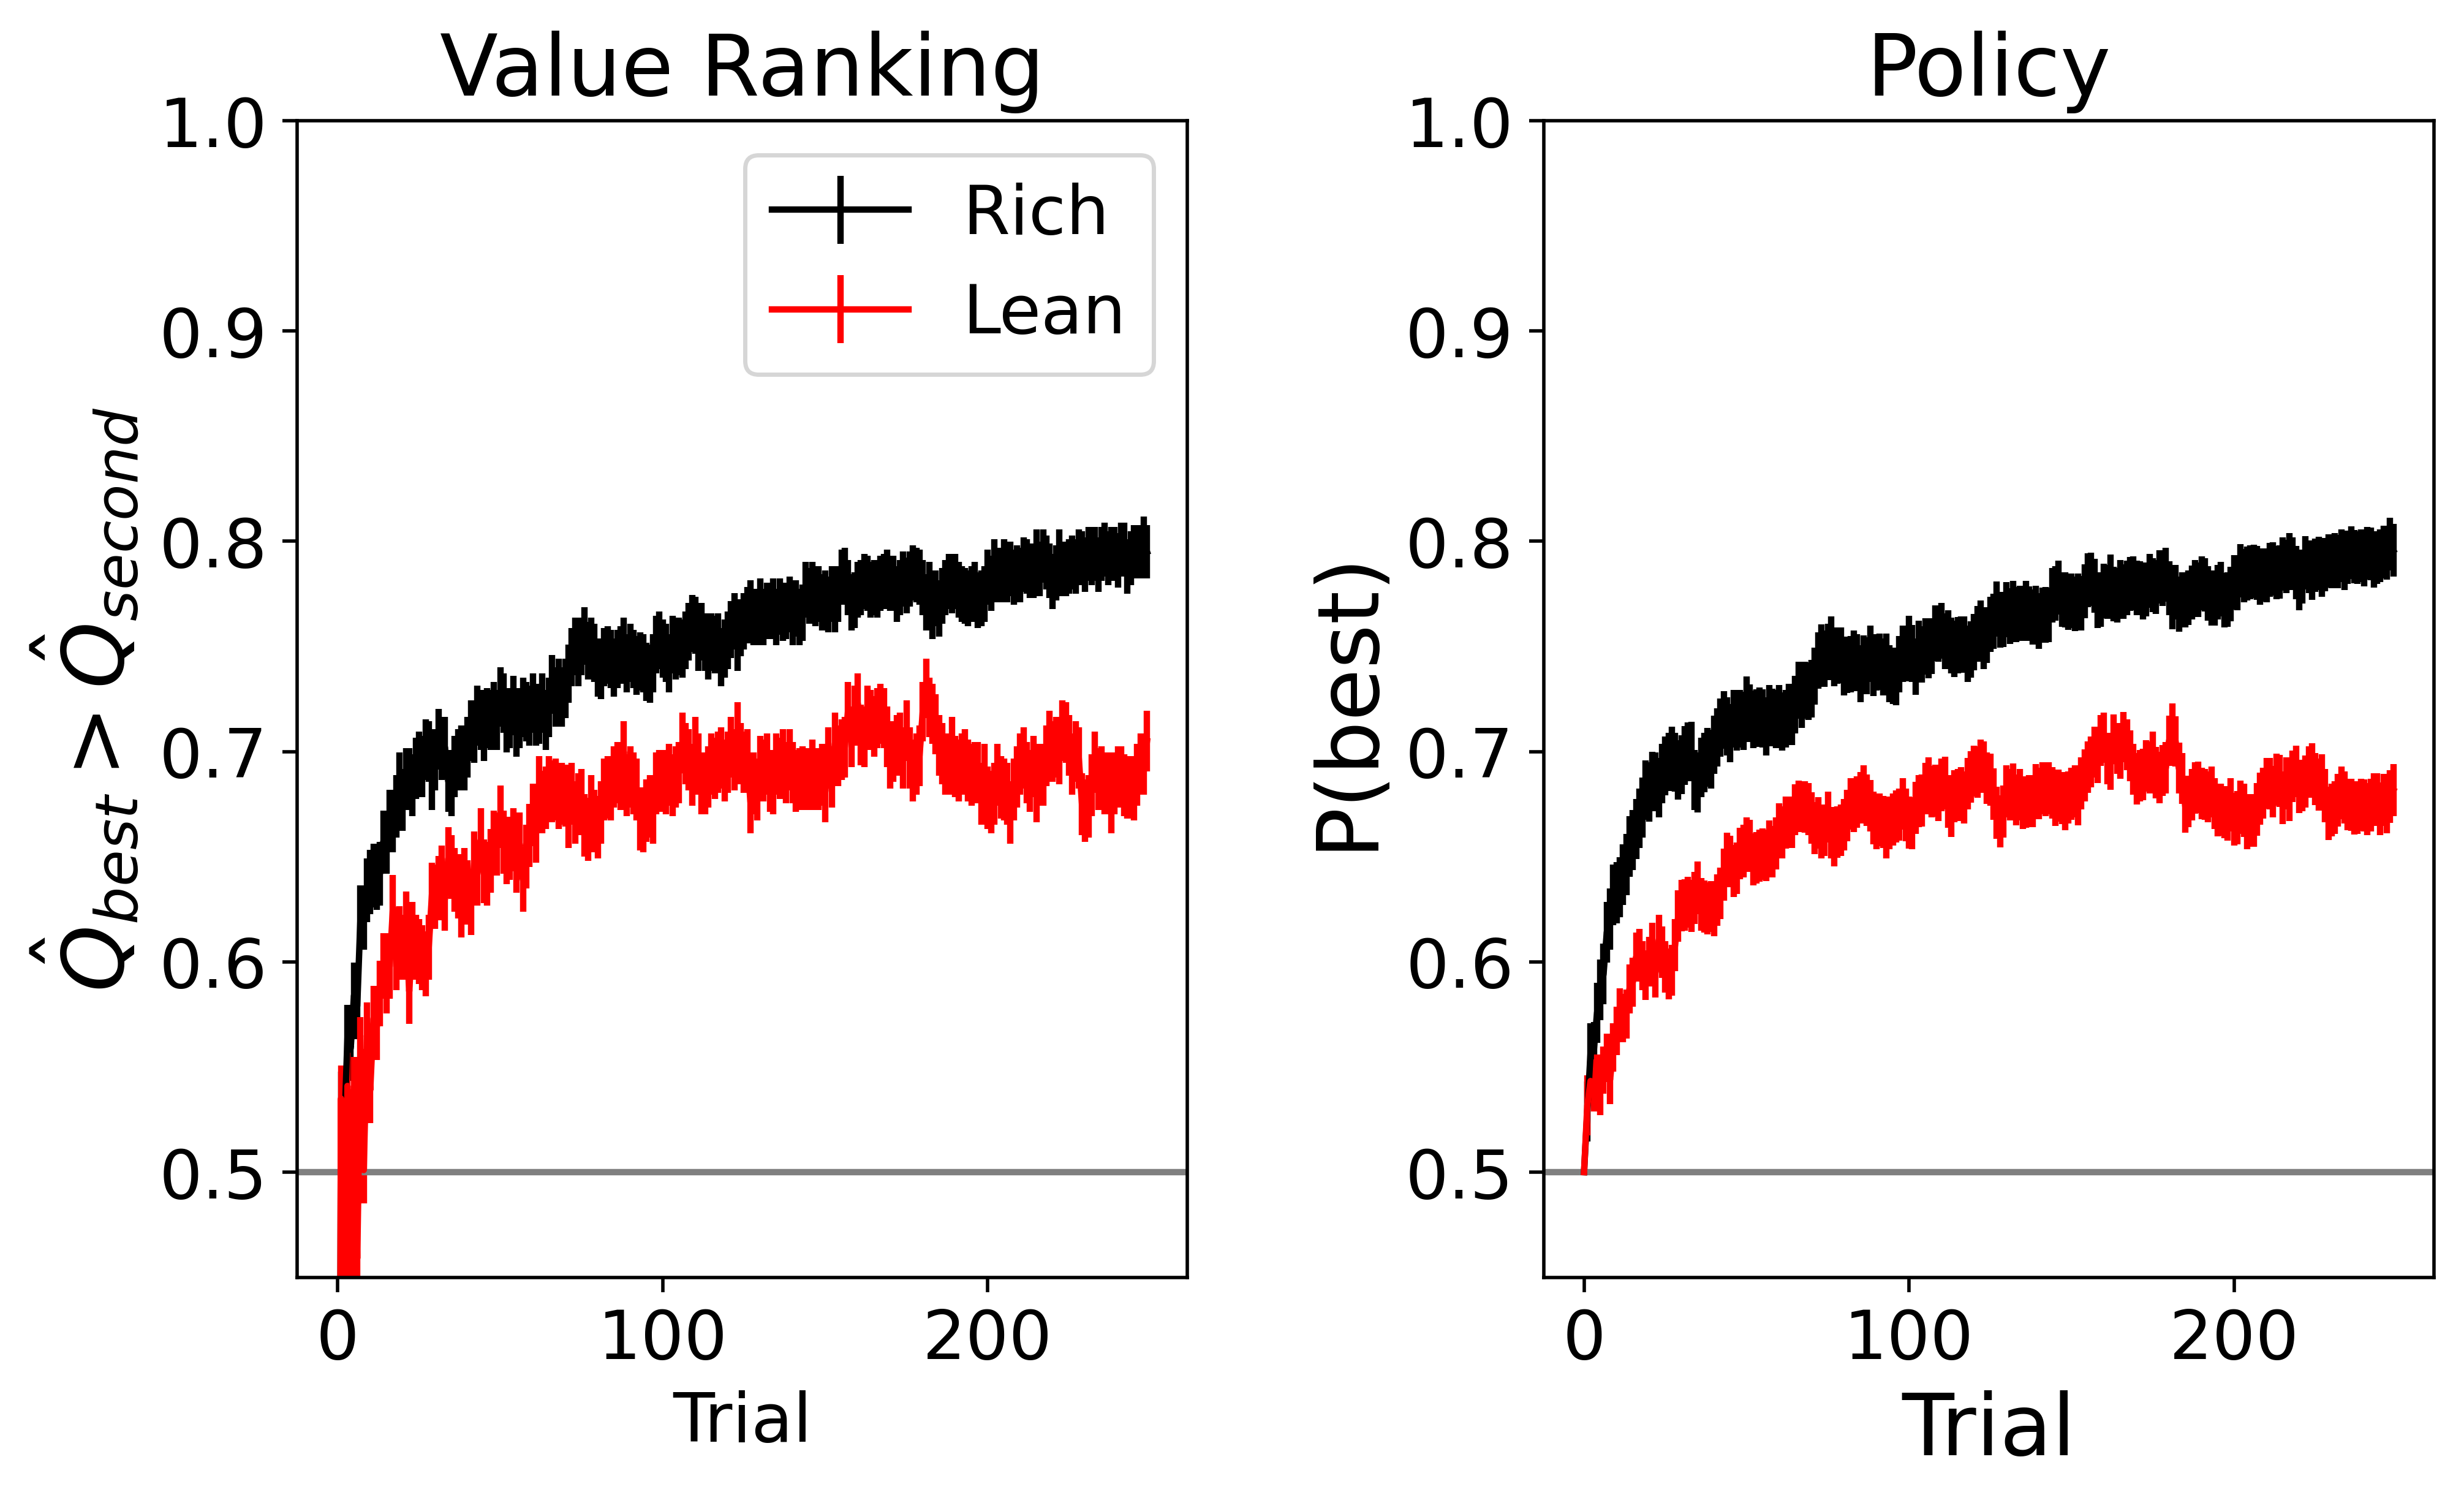

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(9,5)) # width, height
plt.rcParams.update({'font.size': 16})

lim = [.45, 1.0]

fill_me = axs[0] # axs[row,col]
xaxis = np.arange(n_trials)
fill_me.set_title("Value Ranking", fontsize=20)
fill_me.set_ylabel("$\^{Q}_{best} > \^{Q}_{second}$", fontsize=20)
fill_me.set_xlabel("Trial")
fill_me.errorbar(xaxis,r_order_mean,yerr=r_order_sem, c = "black")
fill_me.errorbar(xaxis,l_order_mean,yerr=l_order_sem, c = "red")
fill_me.legend(["Rich","Lean"],fontsize=16)
fill_me.axhline(y=0.5, color="grey")
fill_me.set_ylim(lim)

xaxis = np.arange(n_trials)
fill_me = axs[1] # axs[row,col]
fill_me.set_title("Policy", fontsize=20)
fill_me.set_ylabel("P(best)", fontsize=20)
fill_me.set_xlabel("Trial", fontsize=20)
fill_me.errorbar(xaxis,r_SM_mean,yerr=r_SM_sem, c = "black")
fill_me.errorbar(xaxis,l_SM_mean,yerr=l_SM_sem, c = "red")
fill_me.axhline(y=0.5, color="grey")
fill_me.set_ylim(lim)
plt.subplots_adjust(wspace=0.4)

/var/folders/x1/w7n6h7cn2z17zbtntm879lcw0000gp/T/ipykernel_24136/1341878678.py:26: UserWarning: The handle <ErrorbarContainer object of 3 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  a1.legend(["80% G", "_nolegend_", "70% G", "_nolegend_", "30% G", "_nolegend_", "20% G", "_nolegend_"],bbox_to_anchor=(2.75, 1.))
/var/folders/x1/w7n6h7cn2z17zbtntm879lcw0000gp/T/ipykernel_24136/1341878678.py:27: UserWarning: The handle <ErrorbarContainer object of 3 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  a3.legend(["_nolegend_", "80% N", "_nolegend_", "70% N", "_nolegend_", "30% N", "_nolegend_", "20% N"],bbox_to_anchor=(1., 0.5))


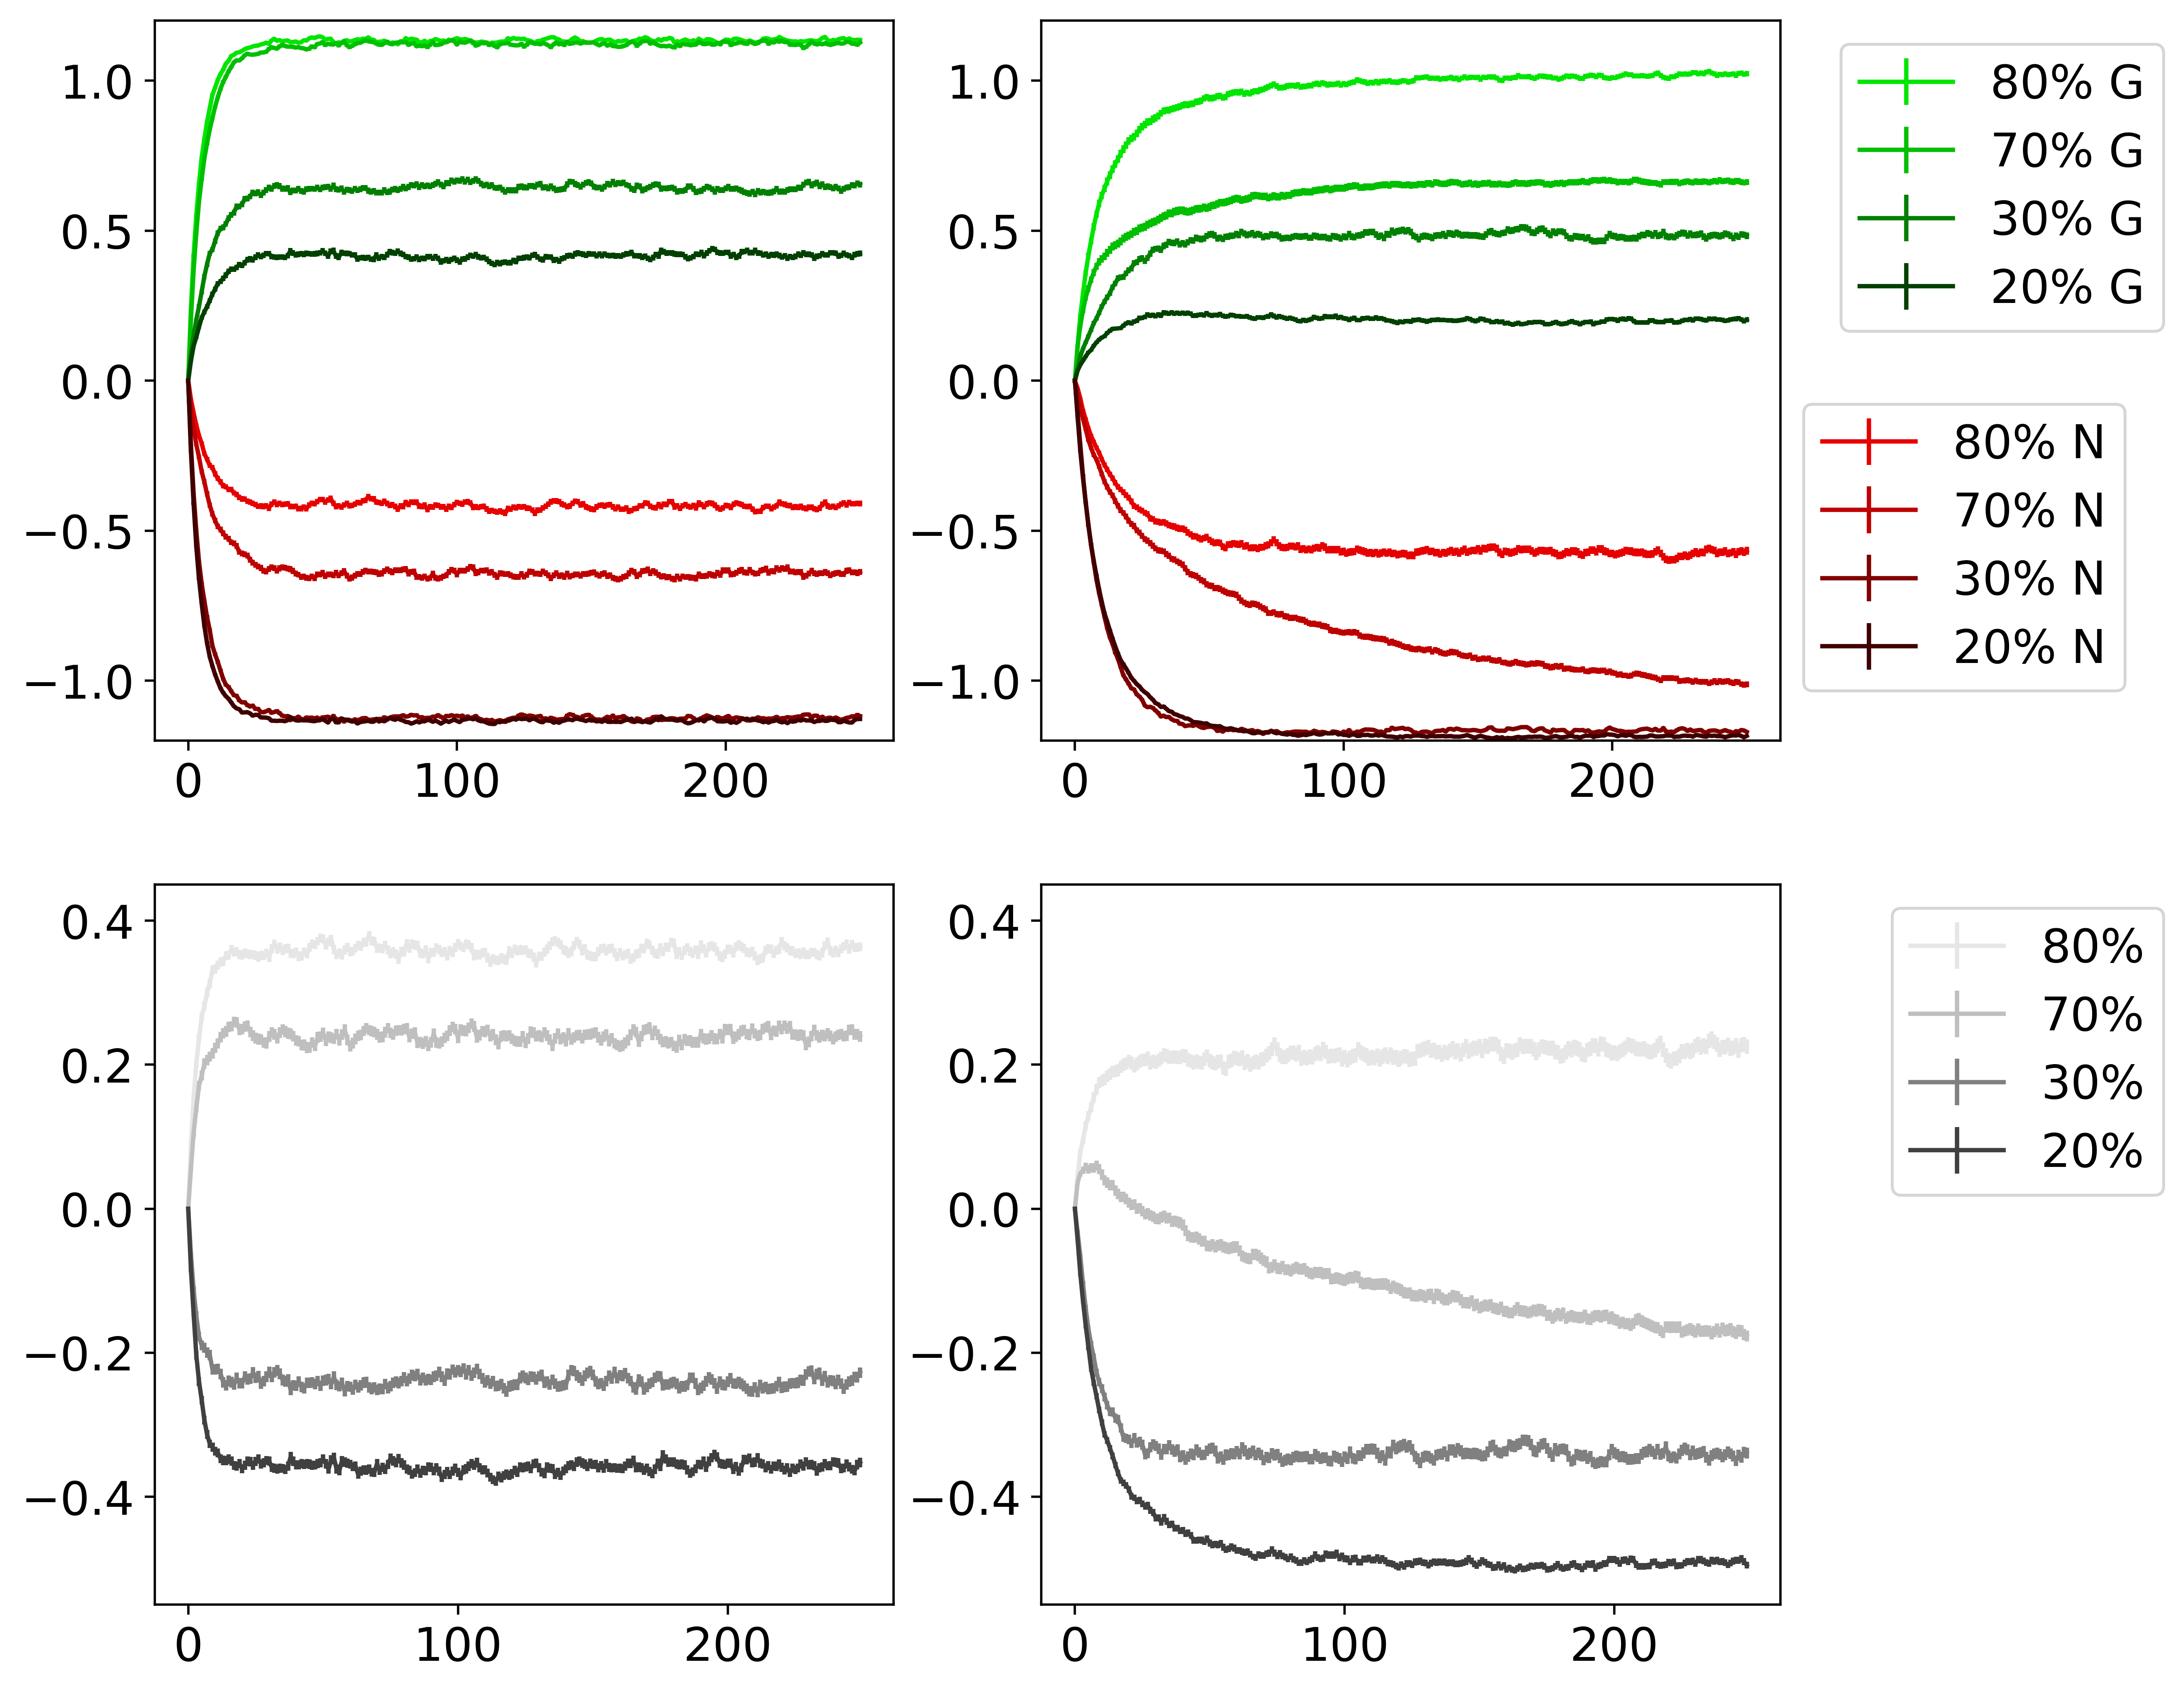

In [ ]:
# G/N curves
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(10, 10))
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.dpi'] = 500

a1 = axs[0,0] # axs[row,col]
a2 = axs[1,0] # axs[row,col]
a3 = axs[0,1] # axs[row,col]
a4 = axs[1,1] # axs[row,col]

a1.set_ylim([-1.2,1.2])
a3.set_ylim([-1.2,1.2])
a2.set_ylim([-.55,.45])
a4.set_ylim([-.55,.45])

plot_dynamicsb.avg_qs(R_states_Bogacz_ref,n_trials,n_states,0,[a1,a1,a2],.9,flip_n=True)
plot_dynamicsb.avg_qs(R_states_Bogacz_ref_second,n_trials,n_states,0,[a1,a1,a2],.75,flip_n=True)
plot_dynamicsb.avg_qs(L_states_Bogacz_ref,n_trials,n_states,0,[a1,a1,a2],0.5,flip_n=True)
plot_dynamicsb.avg_qs(L_states_Bogacz_ref_second,n_trials,n_states,0,[a1,a1,a2],0.25,flip_n=True)

plot_dynamicsb.avg_qs(R_states_Bogacz,n_trials,n_states,0,[a3,a3,a4],.9,flip_n=True)
plot_dynamicsb.avg_qs(R_states_Bogacz,n_trials,n_states,1,[a3,a3,a4],.75,flip_n=True)
plot_dynamicsb.avg_qs(L_states_Bogacz,n_trials,n_states,0,[a3,a3,a4],0.5,flip_n=True)
plot_dynamicsb.avg_qs(L_states_Bogacz,n_trials,n_states,1,[a3,a3,a4],0.25,flip_n=True)

a1.legend(["80% G", "_nolegend_", "70% G", "_nolegend_", "30% G", "_nolegend_", "20% G", "_nolegend_"],bbox_to_anchor=(2.75, 1.))
a3.legend(["_nolegend_", "80% N", "_nolegend_", "70% N", "_nolegend_", "30% N", "_nolegend_", "20% N"],bbox_to_anchor=(1., 0.5))
a2.legend(["80%", "70%", "30%", "20%"],bbox_to_anchor=(2.75, 1.))

In [ ]:
a1.get_legend_handles_labels()

([], [])